In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# France

Source d'information sur les exportations et importations de la France : Institut National de la Statistique et des Études Économiques (INSEE)

web: https://www.insee.fr/fr/statistiques?theme=27

In [3]:
# données des exportations
FR_X_prod = pd.read_csv('C:/Users/Oscar Gomez/Desktop/Data Analyst/P8/FR_X_products.csv', sep=';')
FR_X_prod.drop(columns = ['code'], inplace=True)
FR_X_prod.rename(columns = {'product': 'time'}, inplace=True)
FR_X_prod.set_index('time', inplace=True)
FR_X_prod = FR_X_prod.T
FR_X_prod.index = pd.to_datetime(FR_X_prod.index)
FR_X_prod.head()

time,"Products of Agriculture, forestry and fishing",Natural hydrocarbons and other mining and quarrying,Agrifood industries products (Agrifood industries),"Textiles, clothing, leather and footwear","Wood, paper and cardboard",Manufacture of coke and refined petroleum products,"Chemicals, perfumes and cosmetics",Pharmaceutical products,"Rubber and plastic products, miscellaneous minerals",Steel and metal products,...,"Industrial and agricultural machinery, miscellaneous machinery",Transport equipment,Miscellaneous manufactured products,"Natural hydrocarbons, other mining products, electricity, waste",Electricity and manufactured gas,Industrial and household waste,Publishing and communication products,"Plans and technical drawings, photographic plates and exposed film","Art, antiques and collectors' items",Unworked human hair
2000-01-01,905,48,1847,1190,648,380,2727,983,1088,1759,...,1825,5149,529,431,261,123,172,3,55,0
2000-02-01,946,52,1999,1404,684,401,3081,1035,1198,1996,...,2086,5602,624,438,245,142,184,3,72,0
2000-03-01,1055,71,2344,1521,758,432,3350,1081,1381,2088,...,2501,6380,746,506,286,149,217,5,52,0
2000-04-01,877,54,2082,1188,655,451,2886,918,1149,1811,...,1996,5413,623,435,262,119,169,3,120,0
2000-05-01,941,58,2418,1284,787,457,3137,1051,1320,2183,...,2346,6634,711,448,233,157,195,6,54,0


In [4]:
FR_X_prod['Total'] = FR_X_prod.sum(axis=1)
FR_X_prod.head()

time,"Products of Agriculture, forestry and fishing",Natural hydrocarbons and other mining and quarrying,Agrifood industries products (Agrifood industries),"Textiles, clothing, leather and footwear","Wood, paper and cardboard",Manufacture of coke and refined petroleum products,"Chemicals, perfumes and cosmetics",Pharmaceutical products,"Rubber and plastic products, miscellaneous minerals",Steel and metal products,...,Transport equipment,Miscellaneous manufactured products,"Natural hydrocarbons, other mining products, electricity, waste",Electricity and manufactured gas,Industrial and household waste,Publishing and communication products,"Plans and technical drawings, photographic plates and exposed film","Art, antiques and collectors' items",Unworked human hair,Total
2000-01-01,905,48,1847,1190,648,380,2727,983,1088,1759,...,5149,529,431,261,123,172,3,55,0,23809
2000-02-01,946,52,1999,1404,684,401,3081,1035,1198,1996,...,5602,624,438,245,142,184,3,72,0,26092
2000-03-01,1055,71,2344,1521,758,432,3350,1081,1381,2088,...,6380,746,506,286,149,217,5,52,0,29807
2000-04-01,877,54,2082,1188,655,451,2886,918,1149,1811,...,5413,623,435,262,119,169,3,120,0,25112
2000-05-01,941,58,2418,1284,787,457,3137,1051,1320,2183,...,6634,711,448,233,157,195,6,54,0,29152


In [5]:
FR_X_prod.describe().round(2)

time,"Products of Agriculture, forestry and fishing",Natural hydrocarbons and other mining and quarrying,Agrifood industries products (Agrifood industries),"Textiles, clothing, leather and footwear","Wood, paper and cardboard",Manufacture of coke and refined petroleum products,"Chemicals, perfumes and cosmetics",Pharmaceutical products,"Rubber and plastic products, miscellaneous minerals",Steel and metal products,...,Transport equipment,Miscellaneous manufactured products,"Natural hydrocarbons, other mining products, electricity, waste",Electricity and manufactured gas,Industrial and household waste,Publishing and communication products,"Plans and technical drawings, photographic plates and exposed film","Art, antiques and collectors' items",Unworked human hair,Total
count,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,...,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.0,264.00
mean,1099.98,172.12,3223.35,1652.90,710.21,731.85,4023.79,2098.28,1425.75,2413.74,...,7428.67,1065.02,727.82,238.51,317.18,185.75,2.83,88.78,0.0,34396.39
std,243.31,86.20,719.38,408.83,68.69,268.59,755.14,570.25,198.40,445.74,...,1575.67,320.28,228.00,90.31,124.04,32.63,1.71,59.93,0.0,5599.60
min,676.00,43.00,1847.00,815.00,479.00,220.00,2345.00,918.00,914.00,1174.00,...,2260.00,501.00,337.00,93.00,67.00,68.00,1.00,8.00,0.0,20211.00
25%,911.25,94.75,2562.00,1361.50,676.00,489.25,3381.75,1641.50,1271.00,2062.00,...,6597.25,808.75,542.50,193.00,209.00,165.00,2.00,58.00,0.0,29558.75
50%,1075.00,170.00,3269.00,1542.50,711.50,715.00,4058.50,2146.00,1443.50,2433.50,...,7364.50,1014.00,734.50,233.50,340.50,182.00,2.00,76.00,0.0,35017.50
75%,1245.00,227.25,3799.25,1950.00,759.25,929.25,4565.50,2518.25,1583.75,2760.50,...,8277.50,1302.50,853.25,262.00,408.25,209.00,4.00,105.00,0.0,38538.00
max,1821.00,574.00,4920.00,2906.00,873.00,1562.00,6363.00,3874.00,1881.00,3401.00,...,12217.00,2179.00,1770.00,864.00,615.00,289.00,12.00,782.00,0.0,46960.00


In [6]:
FRX = pd.DataFrame(FR_X_prod['Total'])
FRX['yyyy'] = pd.DatetimeIndex(FRX.index).year
FRX['mm'] = pd.DatetimeIndex(FRX.index).month

X_year = pd.pivot_table(FRX, index=['yyyy'], values=['Total'], aggfunc='sum')
X_year

,Total
yyyy,
2000,329582
2001,337982
2002,335175
2003,329901
2004,346187
2005,364751
2006,400524
2007,410731
2008,423931


In [121]:
X_year['growth'] = (X_year['Total']/X_year['Total'].shift(1)) - 1
X_year

,Total,growth
yyyy,,
2000,329582,NaN
2001,337982,0.025487
2002,335175,-0.008305
2003,329901,-0.015735
2004,346187,0.049366
2005,364751,0.053624
2006,400524,0.098075
2007,410731,0.025484
2008,423931,0.032138


In [122]:
X_year.mean()

Total     412756.727273
growth         0.022862
dtype: float64

In [7]:
# croisance expos 2021
(496141-424987)/496141

0.14341487601306888

In [8]:
# expos par categorie
FR_X_prod['yyyy'] = pd.DatetimeIndex(FR_X_prod.index).year
FR_X_prod['mm'] = pd.DatetimeIndex(FR_X_prod.index).month

X_year_prod = pd.pivot_table(FR_X_prod, index=['yyyy'], values=[' Products of Agriculture, forestry and fishing ',
                                                                ' Natural hydrocarbons and other mining and quarrying ',
                                                                ' Agrifood industries products (Agrifood industries) ',
                                                                ' Textiles, clothing, leather and footwear ',
                                                                ' Wood, paper and cardboard ',
                                                                ' Manufacture of coke and refined petroleum products ',
                                                                ' Chemicals, perfumes and cosmetics ',
                                                                ' Pharmaceutical products ',
                                                                ' Rubber and plastic products, miscellaneous minerals ',
                                                                ' Steel and metal products ',
                                                                ' Computer, electronic and optical products ',
                                                                ' Electrical and household equipment ',
                                                                ' Industrial and agricultural machinery, miscellaneous machinery ',
                                                                ' Transport equipment ',
                                                                ' Miscellaneous manufactured products ',
                                                                ' Natural hydrocarbons, other mining products, electricity, waste ',
                                                                ' Electricity and manufactured gas ',
                                                                ' Industrial and household waste ',
                                                                ' Publishing and communication products ',
                                                                ' Plans and technical drawings, photographic plates and exposed film ',
                                                                ' Art, antiques and collectors\' items ', 
                                                                ' Unworked human hair ', 'Total'], aggfunc='sum')

X_year_prod['Agriculture'] = X_year_prod[' Products of Agriculture, forestry and fishing ']
X_year_prod['Produits alimentaires'] = X_year_prod[' Agrifood industries products (Agrifood industries) ']
X_year_prod['Exploitation minière (y compris les hydrocarbures)'] = X_year_prod[' Natural hydrocarbons and other mining and quarrying '] + X_year_prod[' Manufacture of coke and refined petroleum products '] + X_year_prod[' Natural hydrocarbons, other mining products, electricity, waste ']
X_year_prod['Équipements (y compris les véhicules)'] = X_year_prod[' Computer, electronic and optical products '] + X_year_prod[' Electrical and household equipment '] + X_year_prod[' Transport equipment ']
X_year_prod['Produits pharmaceutiques et cosmétiques'] = X_year_prod[' Chemicals, perfumes and cosmetics '] + X_year_prod[' Pharmaceutical products ']
X_year_prod['Textiles et vêtements'] = X_year_prod[' Textiles, clothing, leather and footwear ']
X_year_prod['Autres'] = X_year_prod['Total'] - X_year_prod['Agriculture'] - X_year_prod['Produits alimentaires'] - X_year_prod['Exploitation minière (y compris les hydrocarbures)'] - X_year_prod['Équipements (y compris les véhicules)'] - X_year_prod['Produits pharmaceutiques et cosmétiques'] - X_year_prod['Textiles et vêtements']

X_year_prod.drop(columns=[' Products of Agriculture, forestry and fishing ',
                          ' Natural hydrocarbons and other mining and quarrying ',
                          ' Agrifood industries products (Agrifood industries) ',
                          ' Textiles, clothing, leather and footwear ', ' Wood, paper and cardboard ',
                          ' Manufacture of coke and refined petroleum products ',
                          ' Chemicals, perfumes and cosmetics ', ' Pharmaceutical products ',
                          ' Rubber and plastic products, miscellaneous minerals ', ' Steel and metal products ',
                          ' Computer, electronic and optical products ', ' Electrical and household equipment ',
                          ' Industrial and agricultural machinery, miscellaneous machinery ', ' Transport equipment ',
                          ' Miscellaneous manufactured products ',
                          ' Natural hydrocarbons, other mining products, electricity, waste ',
                          ' Electricity and manufactured gas ',
                          ' Industrial and household waste ',
                          ' Publishing and communication products ',
                          ' Plans and technical drawings, photographic plates and exposed film ',
                          ' Art, antiques and collectors\' items ', 
                          ' Unworked human hair ', 'Total'], inplace=True)
X_year_prod

time,Agriculture,Produits alimentaires,Exploitation minière (y compris les hydrocarbures),Équipements (y compris les véhicules),Produits pharmaceutiques et cosmétiques,Textiles et vêtements,Autres
yyyy,,,,,,,
2000,10416,27934,11882,124743,49482,15749,89376
2001,9711,28047,11177,130292,51673,16435,90647
2002,10421,28991,10902,123475,53443,16383,91560
2003,10573,29030,11179,119721,53839,15678,89881
2004,10417,29303,13241,125326,56923,15706,95271
2005,10470,29945,19105,128012,60476,15986,100757
2006,10857,32350,22943,138763,65939,16834,112838
2007,11870,34577,22181,136116,68889,17523,119575
2008,13863,36122,28227,134140,72471,17089,122019


In [9]:
X_year_prod2 = pd.pivot_table(FR_X_prod, index=['yyyy'], values=[' Products of Agriculture, forestry and fishing ',
                                                                ' Natural hydrocarbons and other mining and quarrying ',
                                                                ' Agrifood industries products (Agrifood industries) ',
                                                                ' Textiles, clothing, leather and footwear ',
                                                                ' Wood, paper and cardboard ',
                                                                ' Manufacture of coke and refined petroleum products ',
                                                                ' Chemicals, perfumes and cosmetics ',
                                                                ' Pharmaceutical products ',
                                                                ' Rubber and plastic products, miscellaneous minerals ',
                                                                ' Steel and metal products ',
                                                                ' Computer, electronic and optical products ',
                                                                ' Electrical and household equipment ',
                                                                ' Industrial and agricultural machinery, miscellaneous machinery ',
                                                                ' Transport equipment ',
                                                                ' Miscellaneous manufactured products ',
                                                                ' Natural hydrocarbons, other mining products, electricity, waste ',
                                                                ' Electricity and manufactured gas ',
                                                                ' Industrial and household waste ',
                                                                ' Publishing and communication products ',
                                                                ' Plans and technical drawings, photographic plates and exposed film ',
                                                                ' Art, antiques and collectors\' items ', 
                                                                ' Unworked human hair ', 'Total'], aggfunc='sum')

X_year_prod2[' Transport equipment ']

yyyy
2000     68673
2001     77901
2002     76322
2003     77429
2004     80555
2005     82031
2006     87343
2007     87997
2008     87757
2009     72917
2010     85376
2011     86586
2012     93158
2013     92340
2014     93398
2015    103575
2016    106321
2017    107449
2018    112647
2019    118153
2020     78894
2021     84346
Name:  Transport equipment , dtype: int64

(0.0, 125000.0)

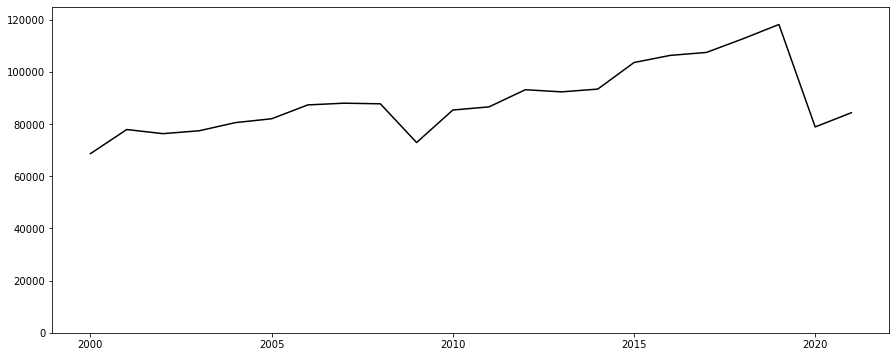

In [10]:
plt.figure(figsize=(15,6))

plt.subplot()
plt.plot(X_year_prod2.index, X_year_prod2[' Transport equipment '], color='k')
plt.ylim(0,125000)



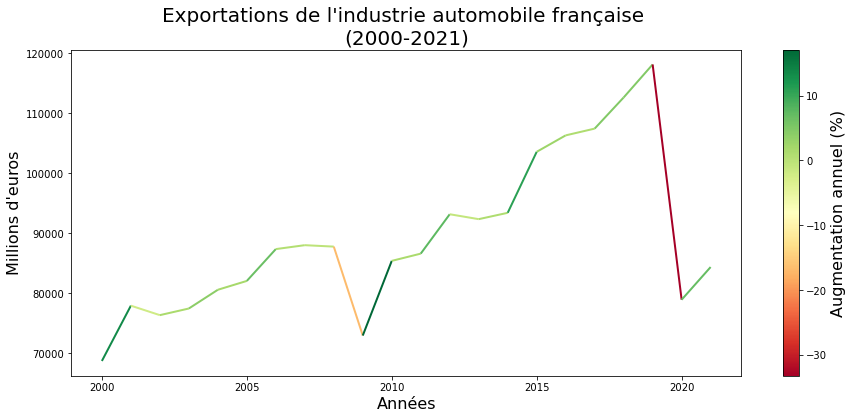

In [11]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap

x = X_year_prod2.index
y = X_year_prod2[' Transport equipment ']
delta_y = 100*(y - y.shift(1))/y.shift(1)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(figsize=(15,6))
norm = plt.Normalize(delta_y.min(), delta_y.max())
lc = LineCollection(segments, norm=norm, cmap='RdYlGn')

lc.set_array(delta_y.shift(-1))
lc.set_linewidth(2)
line = axs.add_collection(lc)
cbar = fig.colorbar(line, ax=axs)
cbar.set_label("Augmentation annuel (%)", loc='center', fontsize=16)
axs.autoscale()

plt.title('Exportations de l\'industrie automobile française \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)

plt.savefig('P8_FR_veh.png');

In [12]:
# données des importations
FR_M_prod = pd.read_csv('C:/Users/Oscar Gomez/Desktop/Data Analyst/P8/FR_M_products.csv', sep=';')
FR_M_prod.drop(columns = ['code'], inplace=True)
FR_M_prod.rename(columns = {'product': 'time'}, inplace=True)
FR_M_prod.set_index('time', inplace=True)
FR_M_prod = FR_M_prod.T
FR_M_prod.index = pd.to_datetime(FR_M_prod.index)
FR_M_prod.head()

time,"Products of Agriculture, forestry and fishing",Natural hydrocarbons and other mining and quarrying,Agri,"Textiles, clothing, leather and footwear","Wood, paper and cardboard",Manufacture of coke and refined petroleum products,"Chemicals, perfumes and cosmetics",Pharmaceutical products,"Rubber and plastic products, miscellaneous minerals",Steel and metal products,...,"Industrial and agricultural machinery, miscellaneous machinery",Transport equipment,Miscellaneous manufactured products,"Natural hydrocarbons, other mining products, electricity, waste",Electricity and manufactured gas,Industrial and household waste,Publishing and communication products,"Plans and technical drawings, photographic plates and exposed film","Art, antiques and collectors' items",Unworked human hair
2000-01-01,715,1887,1434,1843,902,609,2292,732,1103,1842,...,2207,3577,785,2007,54,65,250,8,18,0
2000-02-01,730,1929,1549,2077,948,502,2440,965,1221,2137,...,2295,4004,898,2034,32,74,236,9,15,0
2000-03-01,818,2102,1738,2065,1074,667,2825,961,1376,2439,...,2724,4508,1005,2208,24,83,286,7,26,0
2000-04-01,713,1831,1549,1584,927,516,2328,802,1158,2068,...,2318,3671,853,1943,25,87,223,6,22,0
2000-05-01,768,2138,1898,1800,1093,568,2603,951,1358,2510,...,2815,4509,1014,2250,14,98,266,9,21,0


In [13]:
FR_M_prod['Total'] = FR_M_prod.sum(axis=1)
FR_M_prod.head()

time,"Products of Agriculture, forestry and fishing",Natural hydrocarbons and other mining and quarrying,Agri,"Textiles, clothing, leather and footwear","Wood, paper and cardboard",Manufacture of coke and refined petroleum products,"Chemicals, perfumes and cosmetics",Pharmaceutical products,"Rubber and plastic products, miscellaneous minerals",Steel and metal products,...,Transport equipment,Miscellaneous manufactured products,"Natural hydrocarbons, other mining products, electricity, waste",Electricity and manufactured gas,Industrial and household waste,Publishing and communication products,"Plans and technical drawings, photographic plates and exposed film","Art, antiques and collectors' items",Unworked human hair,Total
2000-01-01,715,1887,1434,1843,902,609,2292,732,1103,1842,...,3577,785,2007,54,65,250,8,18,0,26574
2000-02-01,730,1929,1549,2077,948,502,2440,965,1221,2137,...,4004,898,2034,32,74,236,9,15,0,28462
2000-03-01,818,2102,1738,2065,1074,667,2825,961,1376,2439,...,4508,1005,2208,24,83,286,7,26,0,32157
2000-04-01,713,1831,1549,1584,927,516,2328,802,1158,2068,...,3671,853,1943,25,87,223,6,22,0,27091
2000-05-01,768,2138,1898,1800,1093,568,2603,951,1358,2510,...,4509,1014,2250,14,98,266,9,21,0,31815


In [14]:
FR_M_prod.describe().round(2)

time,"Products of Agriculture, forestry and fishing",Natural hydrocarbons and other mining and quarrying,Agri,"Textiles, clothing, leather and footwear","Wood, paper and cardboard",Manufacture of coke and refined petroleum products,"Chemicals, perfumes and cosmetics",Pharmaceutical products,"Rubber and plastic products, miscellaneous minerals",Steel and metal products,...,Transport equipment,Miscellaneous manufactured products,"Natural hydrocarbons, other mining products, electricity, waste",Electricity and manufactured gas,Industrial and household waste,Publishing and communication products,"Plans and technical drawings, photographic plates and exposed film","Art, antiques and collectors' items",Unworked human hair,Total
count,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,...,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00,264.00
mean,921.97,3240.18,2721.05,2575.92,1055.14,1498.21,3258.09,1792.46,1780.64,2878.57,...,6194.05,1689.44,3434.44,62.92,131.36,250.13,4.39,43.38,0.00,41956.12
std,211.08,1084.11,689.10,573.36,109.86,653.44,553.82,543.51,386.93,635.93,...,1500.27,548.36,1127.53,108.57,38.85,51.06,3.22,29.69,0.06,7946.12
min,481.00,1319.00,1434.00,1584.00,732.00,404.00,1902.00,732.00,988.00,1214.00,...,2498.00,785.00,1409.00,3.00,55.00,101.00,1.00,8.00,0.00,23372.00
25%,775.75,2272.25,2054.00,2098.75,978.00,995.75,2824.75,1298.25,1430.00,2362.25,...,5023.75,1215.25,2439.00,22.00,99.75,214.00,2.00,26.00,0.00,35459.50
50%,910.50,3090.50,2754.00,2451.00,1054.50,1511.00,3326.00,1886.50,1806.50,2939.50,...,6173.50,1635.50,3329.50,39.00,127.50,245.50,3.00,38.00,0.00,43905.00
75%,1059.75,3962.50,3299.75,3031.25,1127.00,1949.75,3672.75,2185.75,2068.50,3417.75,...,7225.00,2124.50,4174.00,68.25,158.00,279.25,6.00,52.00,0.00,48047.50
max,1539.00,6364.00,4189.00,4168.00,1440.00,3346.00,4686.00,3175.00,2734.00,4314.00,...,9668.00,2960.00,6642.00,1400.00,258.00,382.00,17.00,343.00,1.00,62554.00


In [15]:
FRM = pd.DataFrame(FR_M_prod['Total'])
FRM['yyyy'] = pd.DatetimeIndex(FRM.index).year
FRM['mm'] = pd.DatetimeIndex(FRM.index).month

M_year = pd.pivot_table(FRM, index=['yyyy'], values=['Total'], aggfunc='sum')
M_year

,Total
yyyy,
2000,365190
2001,368884
2002,359828
2003,359070
2004,390924
2005,435083
2006,484951
2007,508858
2008,549481


In [123]:
M_year['growth'] = (M_year['Total']/M_year['Total'].shift(1)) - 1
M_year

,Total,growth
yyyy,,
2000,365190,NaN
2001,368884,0.010115
2002,359828,-0.024550
2003,359070,-0.002107
2004,390924,0.088713
2005,435083,0.112961
2006,484951,0.114617
2007,508858,0.049298
2008,549481,0.079832


In [124]:
# croisance impos 2021
(633587-520697)/520697

0.21680555102103527

In [126]:
BAL_year = X_year['Total']-M_year['Total']
BAL_year

yyyy
2000    -35608
2001    -30902
2002    -24653
2003    -29169
2004    -44737
2005    -70332
2006    -84427
2007    -98127
2008   -125550
2009    -94132
2010   -107128
2011   -141350
2012   -135502
2013   -127598
2014   -112730
2015    -89570
2016    -85069
2017   -105048
2018   -114012
2019   -106968
2020    -95710
2021   -137446
Name: Total, dtype: int64

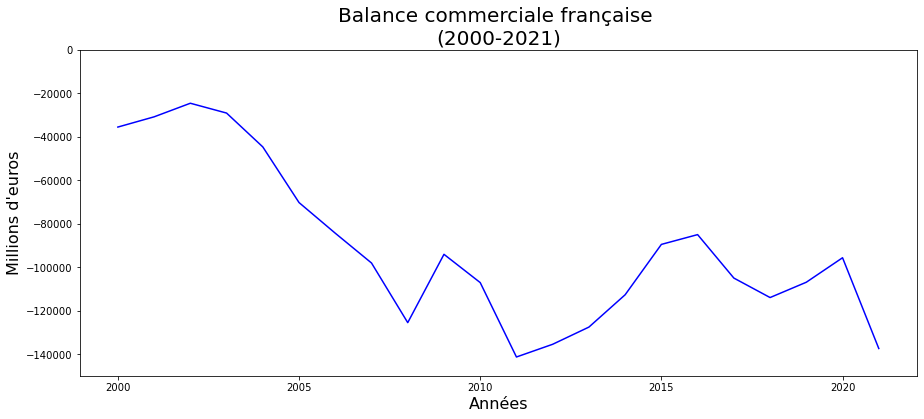

In [130]:
plt.figure(figsize=(15,6))

plt.subplot()
plt.plot(BAL_year.index, BAL_year, color='blue')
plt.ylim(-150000,0)

plt.title('Balance commerciale française \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)

plt.show()

In [17]:
# impos par categorie
FR_M_prod['yyyy'] = pd.DatetimeIndex(FR_M_prod.index).year
FR_M_prod['mm'] = pd.DatetimeIndex(FR_M_prod.index).month

M_year_prod = pd.pivot_table(FR_M_prod, index=['yyyy'], values=[' Products of Agriculture, forestry and fishing ',
                                                                ' Natural hydrocarbons and other mining and quarrying ',
                                                                ' Agri',
                                                                ' Textiles, clothing, leather and footwear ',
                                                                ' Wood, paper and cardboard ',
                                                                ' Manufacture of coke and refined petroleum products ',
                                                                ' Chemicals, perfumes and cosmetics ',
                                                                ' Pharmaceutical products ',
                                                                ' Rubber and plastic products, miscellaneous minerals ',
                                                                ' Steel and metal products ',
                                                                ' Computer, electronic and optical products ',
                                                                ' Electrical and household equipment ',
                                                                ' Industrial and agricultural machinery, miscellaneous machinery ',
                                                                ' Transport equipment ',
                                                                ' Miscellaneous manufactured products ',
                                                                ' Natural hydrocarbons, other mining products, electricity, waste ',
                                                                ' Electricity and manufactured gas ',
                                                                ' Industrial and household waste ',
                                                                ' Publishing and communication products ',
                                                                ' Plans and technical drawings, photographic plates and exposed film ',
                                                                ' Art, antiques and collectors\' items ', 
                                                                ' Unworked human hair ', 'Total'], aggfunc='sum')

M_year_prod['Agriculture'] = M_year_prod[' Products of Agriculture, forestry and fishing ']
M_year_prod['Produits alimentaires'] = M_year_prod[' Agri']
M_year_prod['Exploitation minière (y compris les hydrocarbures)'] = M_year_prod[' Natural hydrocarbons and other mining and quarrying '] + M_year_prod[' Manufacture of coke and refined petroleum products '] + M_year_prod[' Natural hydrocarbons, other mining products, electricity, waste ']
M_year_prod['Équipements (y compris les véhicules)'] = M_year_prod[' Computer, electronic and optical products '] + M_year_prod[' Electrical and household equipment '] + M_year_prod[' Transport equipment ']
M_year_prod['Produits pharmaceutiques et cosmétiques'] = M_year_prod[' Chemicals, perfumes and cosmetics '] + M_year_prod[' Pharmaceutical products ']
M_year_prod['Textiles et vêtements'] = M_year_prod[' Textiles, clothing, leather and footwear ']
M_year_prod['Autres'] = M_year_prod['Total'] - M_year_prod['Agriculture'] - M_year_prod['Produits alimentaires'] - M_year_prod['Exploitation minière (y compris les hydrocarbures)'] - M_year_prod['Équipements (y compris les véhicules)'] - M_year_prod['Produits pharmaceutiques et cosmétiques'] - M_year_prod['Textiles et vêtements']

M_year_prod.drop(columns=[' Products of Agriculture, forestry and fishing ',
                          ' Natural hydrocarbons and other mining and quarrying ',
                          ' Agri',
                          ' Textiles, clothing, leather and footwear ', ' Wood, paper and cardboard ',
                          ' Manufacture of coke and refined petroleum products ',
                          ' Chemicals, perfumes and cosmetics ', ' Pharmaceutical products ',
                          ' Rubber and plastic products, miscellaneous minerals ', ' Steel and metal products ',
                          ' Computer, electronic and optical products ', ' Electrical and household equipment ',
                          ' Industrial and agricultural machinery, miscellaneous machinery ', ' Transport equipment ',
                          ' Miscellaneous manufactured products ',
                          ' Natural hydrocarbons, other mining products, electricity, waste ',
                          ' Electricity and manufactured gas ',
                          ' Industrial and household waste ',
                          ' Publishing and communication products ',
                          ' Plans and technical drawings, photographic plates and exposed film ',
                          ' Art, antiques and collectors\' items ', 
                          ' Unworked human hair ', 'Total'], inplace=True)
M_year_prod

time,Agriculture,Produits alimentaires,Exploitation minière (y compris les hydrocarbures),Équipements (y compris les véhicules),Produits pharmaceutiques et cosmétiques,Textiles et vêtements,Autres
yyyy,,,,,,,
2000,8233,20795,61712,110441,40742,23180,100087
2001,8534,22027,59417,111774,42446,24666,100020
2002,8632,22592,55729,107626,43381,24571,97297
2003,8831,22484,58187,105180,43611,23970,96807
2004,8710,23288,69496,112636,46274,24455,106065
2005,8892,24027,94358,120315,50191,25412,111888
2006,9126,25475,113541,132485,53117,26488,124719
2007,9837,27752,110502,136291,57885,27639,138952
2008,10521,30784,145096,135189,60680,27591,139620


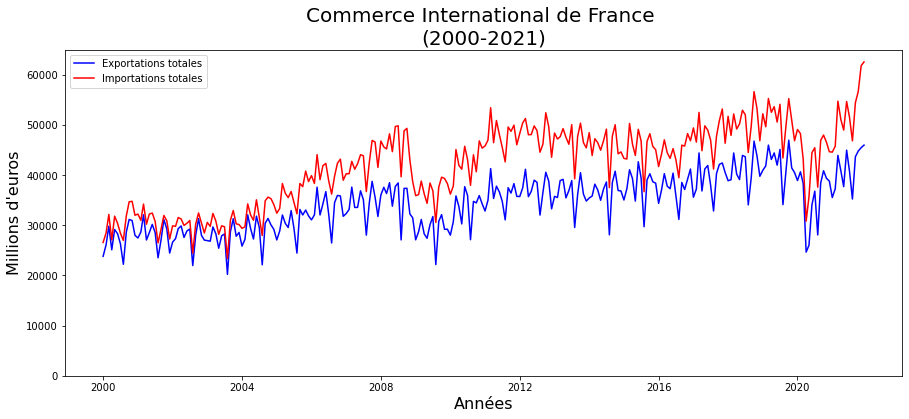

In [18]:
plt.figure(figsize=(15,6))

plt.subplot()
plt.plot(FR_X_prod.index, FR_X_prod['Total'], label='Exportations totales', color='b')
plt.plot(FR_M_prod.index, FR_M_prod['Total'], label='Importations totales', color='r')
plt.ylim(0,65000)

plt.title('Commerce International de France \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper left')

plt.savefig('P8_FR_commtotal.png');

In [19]:
X_year_prod[21:22].values

array([[ 16483,  53341,  25072, 135399, 101030,  29648, 135168]],
      dtype=int64)

In [20]:
data2021X = [16483,  53341,  25072, 135399, 101030,  29648, 135168]

In [21]:
M_year_prod[21:22].values

array([[ 15650,  46018, 100728, 168009,  83443,  39472, 180267]],
      dtype=int64)

In [22]:
data2021M = [15650,  46018, 100728, 168009,  83443,  39472, 180267]

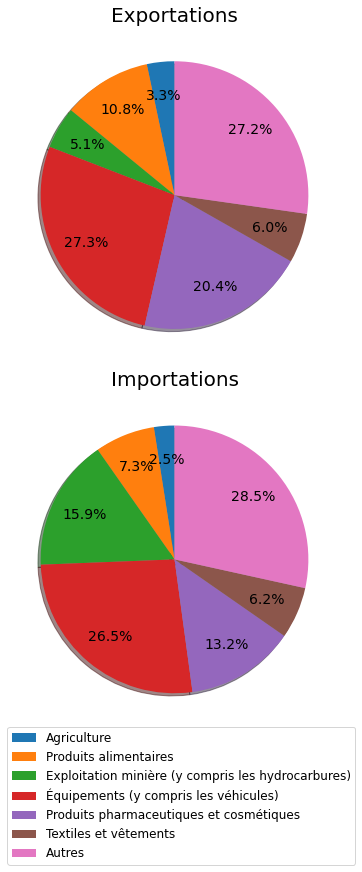

In [23]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(6,12), constrained_layout=True)

ax1.pie(data2021X, autopct='%1.1f%%',  shadow=True, startangle=90, textprops={'size': 14}, pctdistance=0.75)
ax1.set_title('Exportations', fontsize=20)
ax2.pie(data2021M, autopct='%1.1f%%',  shadow=True, startangle=90, textprops={'size': 14}, pctdistance=0.75)
ax2.set_title('Importations', fontsize=20)

plt.legend(X_year_prod.columns, bbox_to_anchor=(0, 0), loc='upper left', fontsize=12, borderaxespad=0.)
plt.show()

In [118]:
FR_series = pd.DataFrame(FR_X_prod['Total'])
FR_series.rename(columns={'Total': 'expo'}, inplace=True)
FR_series['impo'] = FR_M_prod['Total']
FR_series['bal_trade'] = FR_series['expo'] - FR_series['impo']
FR_series['total_trade'] = FR_series['expo'] + FR_series['impo']
FR_series.tail(12)

,expo,impo,bal_trade,total_trade
2021-01-01,35519,44580,-9061,80099
2021-02-01,37273,45751,-8478,83024
2021-03-01,43939,54732,-10793,98671
2021-04-01,40874,51098,-10224,91972
2021-05-01,37694,48965,-11271,86659
2021-06-01,44967,54665,-9698,99632
2021-07-01,40779,51546,-10767,92325
2021-08-01,35228,46822,-11594,82050
2021-09-01,43648,54410,-10762,98058
2021-10-01,44777,56650,-11873,101427


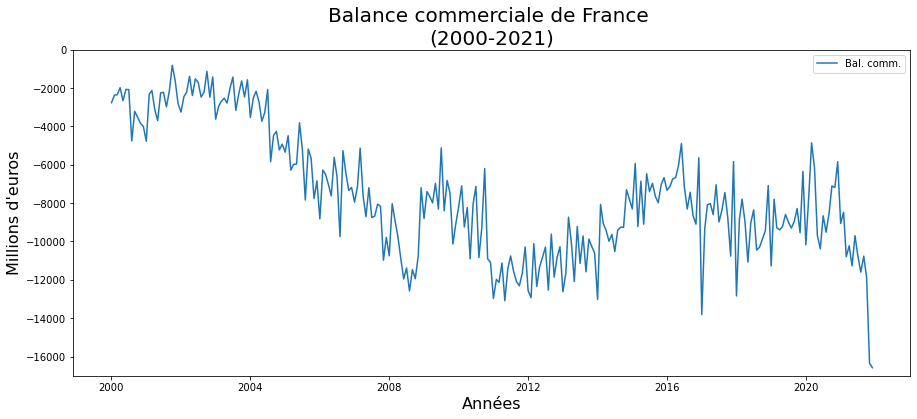

In [25]:
plt.figure(figsize=(15,6))

plt.plot(FR_series.index, FR_series['bal_trade'], label='Bal. comm.')
plt.ylim(-17000, 0)

plt.title('Balance commerciale de France \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper right')

plt.savefig('P8_FR_balance.png');

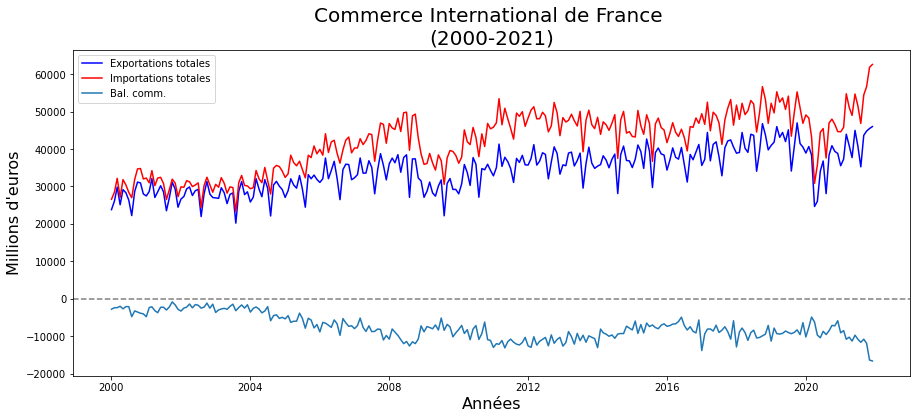

In [26]:
plt.figure(figsize=(15,6))

plt.subplot()
plt.plot(FR_X_prod.index, FR_X_prod['Total'], label='Exportations totales', color='b')
plt.plot(FR_M_prod.index, FR_M_prod['Total'], label='Importations totales', color='r')
plt.plot(FR_series.index, FR_series['bal_trade'], label='Bal. comm.')
plt.axhline(y = 0, color = 'grey', linestyle = '--')

plt.title('Commerce International de France \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper left')

plt.savefig('P8_FR_commtotal2.png');

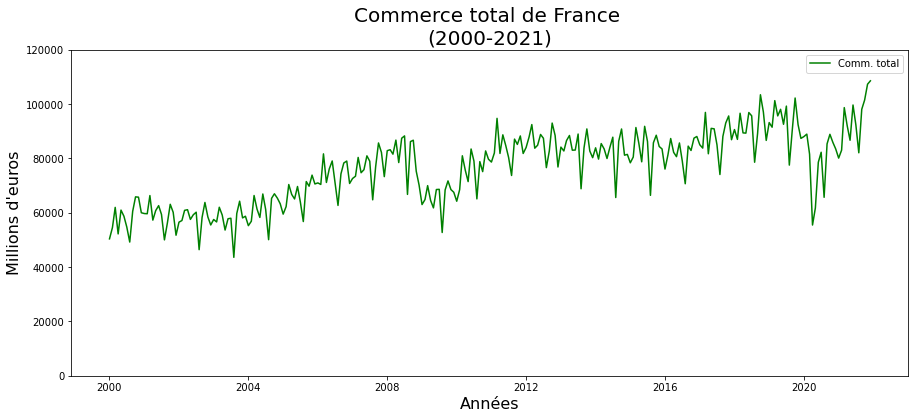

In [27]:
plt.figure(figsize=(15,6))

plt.plot(FR_series.index, FR_series['total_trade'], label='Comm. total', color='green')
plt.ylim(0, 120000)

plt.title('Commerce total de France \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper right')

plt.savefig('P8_FR_totalcomm.png');

## Désaisonnalisation à l'aide des moyennes mobiles
### Exportations

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
# décomposition additive
decomp_FR_expo_add = seasonal_decompose(FR_series['expo'],  model='additive', extrapolate_trend='freq')

# décomposition multiplicative
decomp_FR_expo_mul = seasonal_decompose(FR_series['expo'],  model='multiplicative', extrapolate_trend='freq')

In [30]:
# Descomposition additive
# Valeurs réelles = Sum de (seas + trend + resid)
FRX_ma_add = pd.concat([decomp_FR_expo_add.seasonal, decomp_FR_expo_add.trend, decomp_FR_expo_add.resid, decomp_FR_expo_add.observed], axis=1)
FRX_ma_add.columns = ['seas', 'trend', 'resid', 'actual_values']
FRX_ma_add.head()

,seas,trend,resid,actual_values
2000-01-01,-1726.409155,27493.419289,-1958.010134,23809.0
2000-02-01,-416.229138,27565.208916,-1056.979778,26092.0
2000-03-01,3170.072091,27636.998543,-1000.070634,29807.0
2000-04-01,-318.058498,27708.788170,-2278.729672,25112.0
2000-05-01,-998.448557,27780.577797,2369.870760,29152.0


In [31]:
# Descomposition multiplicative
# Valeurs réelles = produit de (seas * trend * resid)
FRX_ma_mul = pd.concat([decomp_FR_expo_mul.seasonal, decomp_FR_expo_mul.trend, decomp_FR_expo_mul.resid, decomp_FR_expo_mul.observed], axis=1)
FRX_ma_mul.columns = ['seas', 'trend', 'resid', 'actual_values']
FRX_ma_mul.head()

,seas,trend,resid,actual_values
2000-01-01,0.947989,27493.419289,0.913501,23809.0
2000-02-01,0.987270,27565.208916,0.958760,26092.0
2000-03-01,1.092986,27636.998543,0.986763,29807.0
2000-04-01,0.991344,27708.788170,0.914196,25112.0
2000-05-01,0.971207,27780.577797,1.080476,29152.0


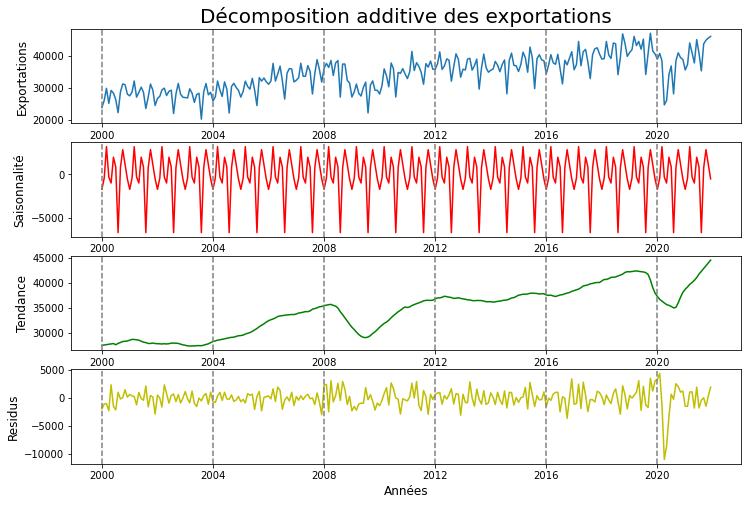

In [32]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.2)

plt.subplot(411)
plt.plot(FRX_ma_add.index, FRX_ma_add['actual_values'])
plt.ylabel('Exportations', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.title('Décomposition additive des exportations', fontsize=20)

plt.subplot(412)
plt.plot(FRX_ma_add.index, FRX_ma_add['seas'], 'r')
plt.ylabel('Saisonnalité', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.subplot(413)
plt.plot(FRX_ma_add.index, FRX_ma_add['trend'], 'g')
plt.ylabel('Tendance', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.subplot(414)
plt.plot(FRX_ma_add.index, FRX_ma_add['resid'], 'y')
plt.ylabel('Residus', fontsize=12)
plt.xlabel('Années', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.savefig('P8_FRX_season_add')
plt.show()

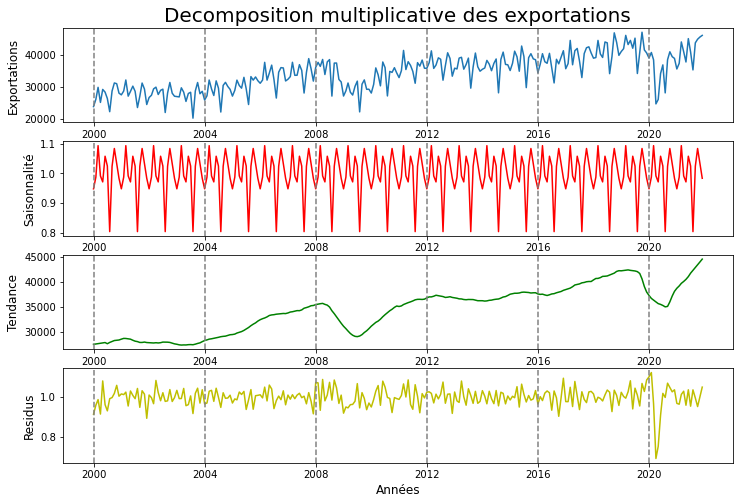

In [33]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.2)

plt.subplot(411)
plt.plot(FRX_ma_mul.index, FRX_ma_mul['actual_values'])
plt.ylabel('Exportations', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.title('Decomposition multiplicative des exportations', fontsize=20)

plt.subplot(412)
plt.plot(FRX_ma_mul.index, FRX_ma_mul['seas'], 'r')
plt.ylabel('Saisonnalité', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.subplot(413)
plt.plot(FRX_ma_mul.index, FRX_ma_mul['trend'], 'g')
plt.ylabel('Tendance', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.subplot(414)
plt.plot(FRX_ma_mul.index, FRX_ma_mul['resid'], 'y')
plt.ylabel('Residus', fontsize=12)
plt.xlabel('Années', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.savefig('P8_FRX_season_mul')
plt.show()

Étant donné que le tracé des résidus dans les deux décompositions semble avoir le même caractère aléatoire, la décomposition additive sera utilisée à partir de maintenant.
$ Valeurs\ réelles = Saisonnalité + Téndance + Residus $

In [131]:
# correction de la saisonnalité
FR_series['expo_ma'] = FR_series['expo'] - FRX_ma_add['seas'].round(2)
FR_series.head()

,expo,impo,bal_trade,total_trade,expo_ma
2000-01-01,23809,26574,-2765,50383,25535.41
2000-02-01,26092,28462,-2370,54554,26508.23
2000-03-01,29807,32157,-2350,61964,26636.93
2000-04-01,25112,27091,-1979,52203,25430.06
2000-05-01,29152,31815,-2663,60967,30150.45


### Importations

In [35]:
decomp_FR_impo = seasonal_decompose(FR_series['impo'],  model='additive', extrapolate_trend='freq')

FRM_ma = pd.concat([decomp_FR_impo.seasonal, decomp_FR_impo.trend, decomp_FR_impo.resid, decomp_FR_impo.observed], axis=1)
FRM_ma.columns = ['seas', 'trend', 'resid', 'actual_values']
FRM_ma.head()

,seas,trend,resid,actual_values
2000-01-01,-422.261672,30952.010004,-3955.748332,26574.0
2000-02-01,-910.238520,30991.709013,-1619.470493,28462.0
2000-03-01,2615.920994,31031.408023,-1490.329017,32157.0
2000-04-01,-643.832370,31071.107032,-3336.274662,27091.0
2000-05-01,-449.324370,31110.806041,1153.518329,31815.0


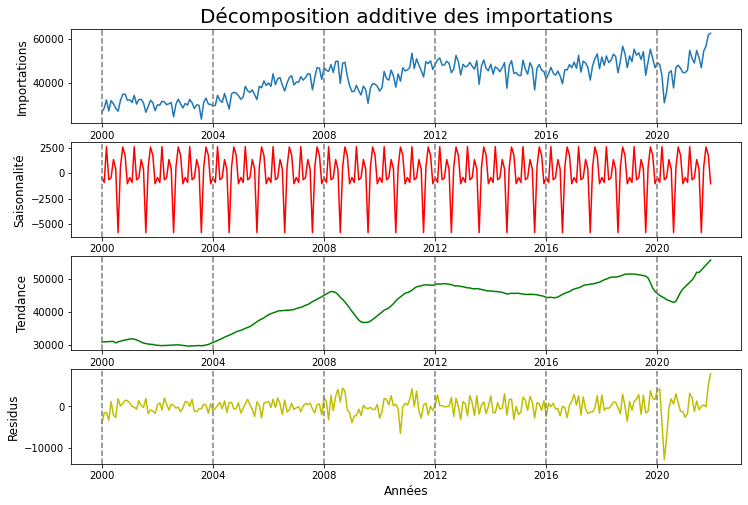

In [36]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.2)

plt.subplot(411)
plt.plot(FRM_ma.index, FRM_ma['actual_values'])
plt.ylabel('Importations', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.title('Décomposition additive des importations', fontsize=20)

plt.subplot(412)
plt.plot(FRM_ma.index, FRM_ma['seas'], 'r')
plt.ylabel('Saisonnalité', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.subplot(413)
plt.plot(FRM_ma.index, FRM_ma['trend'], 'g')
plt.ylabel('Tendance', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.subplot(414)
plt.plot(FRM_ma.index, FRM_ma['resid'], 'y')
plt.ylabel('Residus', fontsize=12)
plt.xlabel('Années', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.savefig('P8_FRM_season')
plt.show()

In [132]:
# correction de la saisonnalité
FR_series['impo_ma'] = FR_series['impo'] - FRM_ma['seas'].round(2)
FR_series.head()

,expo,impo,bal_trade,total_trade,expo_ma,impo_ma
2000-01-01,23809,26574,-2765,50383,25535.41,26996.26
2000-02-01,26092,28462,-2370,54554,26508.23,29372.24
2000-03-01,29807,32157,-2350,61964,26636.93,29541.08
2000-04-01,25112,27091,-1979,52203,25430.06,27734.83
2000-05-01,29152,31815,-2663,60967,30150.45,32264.32


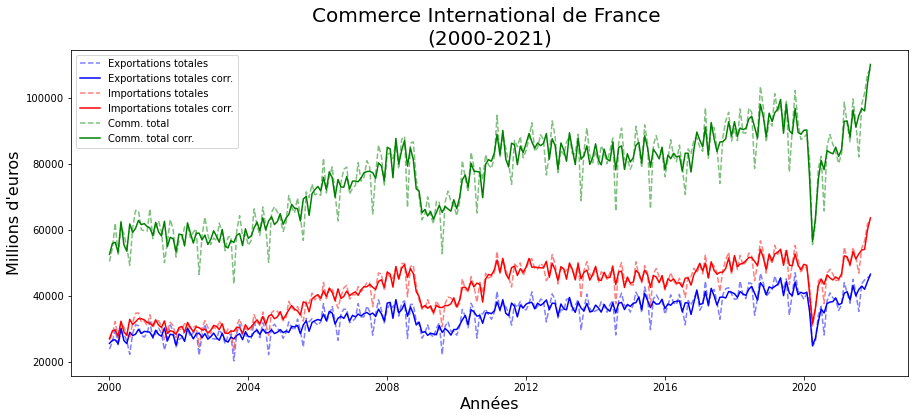

In [143]:
plt.figure(figsize=(15,6))

plt.subplot()
plt.plot(FR_X_prod.index, FR_X_prod['Total'], label='Exportations totales', linestyle='--', color='b', alpha=0.5)
plt.plot(FR_series.index, FR_series['expo_ma'], label='Exportations totales corr.', color='b')
plt.plot(FR_M_prod.index, FR_M_prod['Total'], label='Importations totales', linestyle='--', color='r', alpha=0.5)
plt.plot(FR_series.index, FR_series['impo_ma'], label='Importations totales corr.', color='r')
plt.plot(FR_series.index, FR_series['total_trade'], label='Comm. total', color='green', linestyle='--', alpha=0.5)
plt.plot(FR_series.index, FR_series['tot_trade_ma'], label='Comm. total corr.', color='green')

plt.title('Commerce International de France \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper left')

plt.savefig('P8_FR_compcor.png');

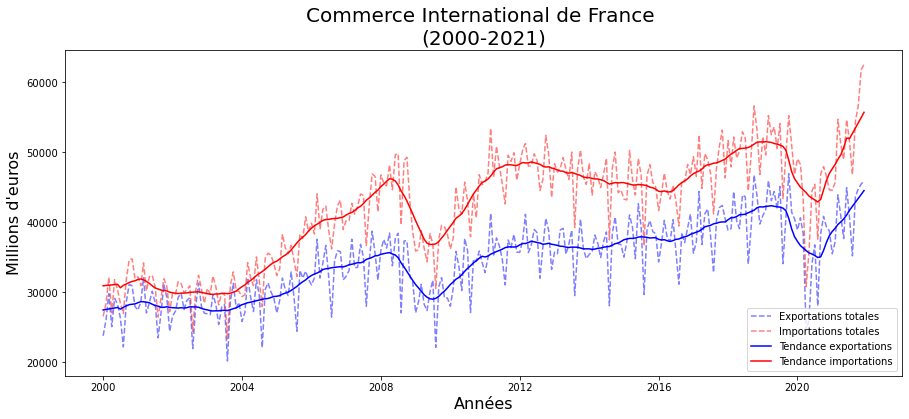

In [141]:
plt.figure(figsize=(15,6))

plt.subplot()
plt.plot(FR_X_prod.index, FR_X_prod['Total'], label='Exportations totales', linestyle='--', color='b', alpha=0.5)
plt.plot(FR_M_prod.index, FR_M_prod['Total'], label='Importations totales', linestyle='--', color='r', alpha=0.5)
plt.plot(FRX_ma_add.index, FRX_ma_add['trend'], label='Tendance exportations', color='b')
plt.plot(FRM_ma.index, FRM_ma['trend'], label='Tendance importations', color='r')


plt.title('Commerce International de France \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='lower right')

plt.savefig('P8_FR_tendcor.png');

### Commerce total

In [40]:
decomp_FR_tot = seasonal_decompose(FR_series['total_trade'],  model='additive', extrapolate_trend='freq')

FRT_ma = pd.concat([decomp_FR_tot.seasonal, decomp_FR_tot.trend, decomp_FR_tot.resid, decomp_FR_tot.observed], axis=1)
FRT_ma.columns = ['seas', 'trend', 'resid', 'actual_values']
FRT_ma.head()

,seas,trend,resid,actual_values
2000-01-01,-2148.670826,58445.429293,-5913.758466,50383.0
2000-02-01,-1326.467658,58556.917929,-2676.450271,54554.0
2000-03-01,5785.993085,58668.406566,-2490.399651,61964.0
2000-04-01,-961.890868,58779.895202,-5615.004334,52203.0
2000-05-01,-1447.772927,58891.383838,3523.389089,60967.0


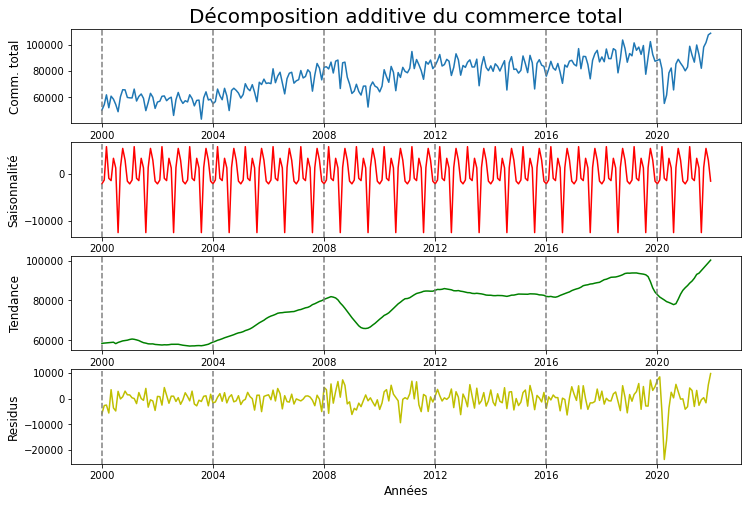

In [41]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(hspace=0.2)

plt.subplot(411)
plt.plot(FRT_ma.index, FRT_ma['actual_values'])
plt.ylabel('Comm. total', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')
plt.title('Décomposition additive du commerce total', fontsize=20)

plt.subplot(412)
plt.plot(FRT_ma.index, FRT_ma['seas'], 'r')
plt.ylabel('Saisonnalité', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.subplot(413)
plt.plot(FRT_ma.index, FRT_ma['trend'], 'g')
plt.ylabel('Tendance', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.subplot(414)
plt.plot(FRT_ma.index, FRT_ma['resid'], 'y')
plt.ylabel('Residus', fontsize=12)
plt.xlabel('Années', fontsize=12)
plt.axvline(pd.to_datetime('01/01/2000'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2004'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2008'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2012'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2016'), linestyle='--', color='grey')
plt.axvline(pd.to_datetime('01/01/2020'), linestyle='--', color='grey')

plt.savefig('P8_FRT_season')
plt.show()

In [138]:
# correction de la saisonnalité
FR_series['tot_trade_ma'] = FR_series['total_trade'] - FRT_ma['seas'].round(2)
FR_series.head()

,expo,impo,bal_trade,total_trade,expo_ma,impo_ma,tot_trade_ma
2000-01-01,23809,26574,-2765,50383,25535.41,26996.26,52531.67
2000-02-01,26092,28462,-2370,54554,26508.23,29372.24,55880.47
2000-03-01,29807,32157,-2350,61964,26636.93,29541.08,56178.01
2000-04-01,25112,27091,-1979,52203,25430.06,27734.83,53164.89
2000-05-01,29152,31815,-2663,60967,30150.45,32264.32,62414.77


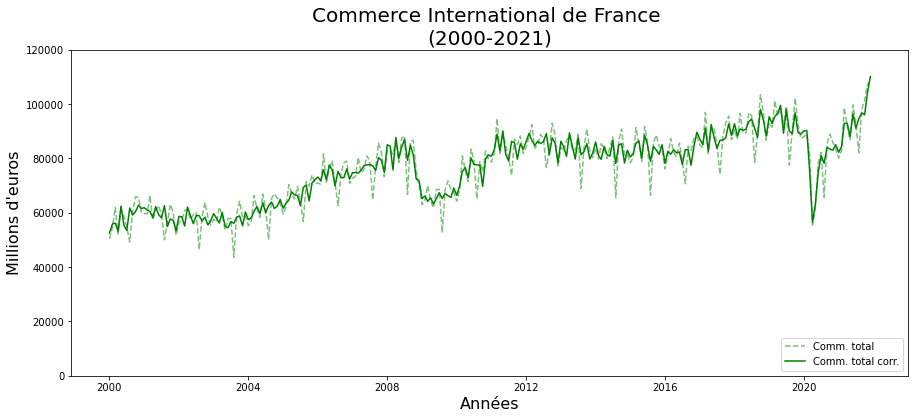

In [43]:
plt.figure(figsize=(15,6))

plt.subplot()
plt.plot(FR_series.index, FR_series['total_trade'], label='Comm. total', color='green', linestyle='--', alpha=0.5)
plt.plot(FR_series.index, FR_series['tot_trade_ma'], label='Comm. total corr.', color='green')
plt.ylim(0, 120000)

plt.title('Commerce International de France \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='lower right')

plt.savefig('P8_FR_comtotcor.png');

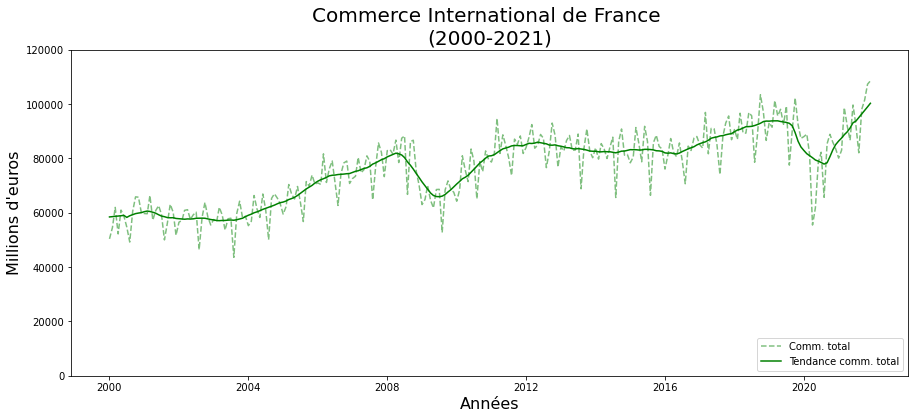

In [44]:
plt.figure(figsize=(15,6))

plt.subplot()
plt.plot(FR_series.index, FR_series['total_trade'], label='Comm. total', color='green', linestyle='--', alpha=0.5)
plt.plot(FRT_ma.index, FRT_ma['trend'], label='Tendance comm. total', color='green')
plt.ylim(0, 120000)

plt.title('Commerce International de France \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='lower right')

plt.savefig('P8_FR_tendtotal.png');

## Estimation prévue du commerce international

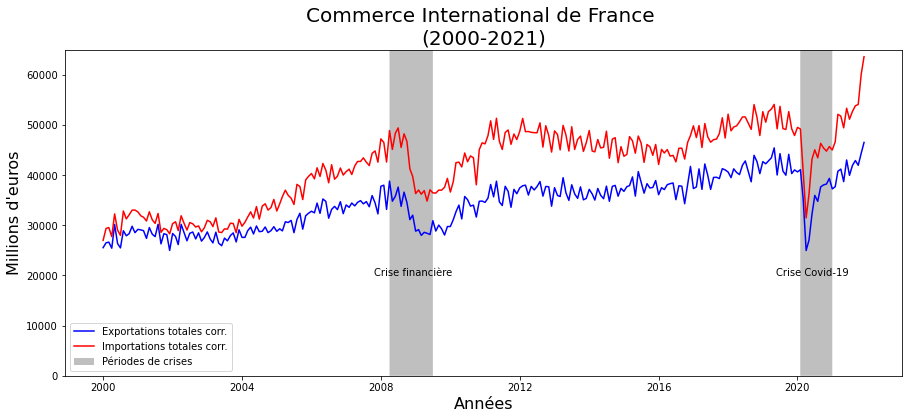

In [45]:
fig, ax = plt.subplots(figsize=(15,6))

y = np.arange(0, 65000, 0.01)
x1 = pd.to_datetime('04/01/2008')
x2 = pd.to_datetime('07/01/2009')
x3 = pd.to_datetime('30/01/2020')
x4 = pd.to_datetime('01/01/2021')

ax.plot(FR_series.index, FR_series['expo_ma'], label='Exportations totales corr.', color='b')
ax.plot(FR_series.index, FR_series['impo_ma'], label='Importations totales corr.', color='r')
ax.fill_betweenx(y, x1, x2, facecolor='grey', alpha = 0.5, label = 'Périodes de crises')
ax.fill_betweenx(y, x3, x4, facecolor='grey', alpha = 0.5)

plt.ylim(0, 65000)
plt.text(pd.to_datetime('12/01/2008'), 20000, 'Crise financière', horizontalalignment = 'center')
plt.text(pd.to_datetime('06/01/2020'), 20000, 'Crise Covid-19', horizontalalignment = 'center')
plt.title('Commerce International de France \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='lower left')

plt.savefig('P8_FR_crises.png');

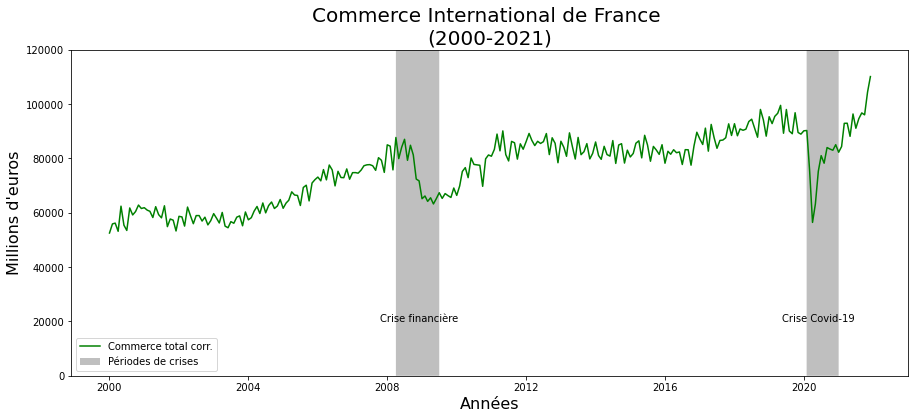

In [46]:
fig, ax = plt.subplots(figsize=(15,6))

y = np.arange(0, 120000, 0.01)
x1 = pd.to_datetime('04/01/2008')
x2 = pd.to_datetime('07/01/2009')
x3 = pd.to_datetime('30/01/2020')
x4 = pd.to_datetime('01/01/2021')

ax.plot(FR_series.index, FR_series['tot_trade_ma'], label='Commerce total corr.', color='green')
ax.fill_betweenx(y, x1, x2, facecolor='grey', alpha = 0.5, label = 'Périodes de crises')
ax.fill_betweenx(y, x3, x4, facecolor='grey', alpha = 0.5)

plt.ylim(0, 120000)
plt.text(pd.to_datetime('12/01/2008'), 20000, 'Crise financière', horizontalalignment = 'center')
plt.text(pd.to_datetime('06/01/2020'), 20000, 'Crise Covid-19', horizontalalignment = 'center')
plt.title('Commerce International de France \n(2000-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='lower left')

plt.savefig('P8_FR_crises.png');

### Crise financière

In [47]:
# tranche crise financiere
FRX_tronc1 = FR_series['expo_ma']['04/01/2003':'04/01/2008']
FRX_a_prevoir1 = FR_series['expo_ma']['04/01/2008':'07/01/2009']

In [48]:
len1 = len(FRX_tronc1)
len1

61

In [49]:
from statsmodels.tsa.stattools import adfuller, kpss

In [50]:
# ADF Test
result_adf = adfuller(FRX_tronc1.values, autolag='AIC')
print(f'ADF Statistic: {result_adf[0].round(2)}')
print(f'p-value: {result_adf[1].round(2)}')

ADF Statistic: -0.29
p-value: 0.93


La $p-valeur$ du test ADF est supérieure à 0,05, donc l'hypothèse nulle de non stationnarité ne peut être rejetée.

In [51]:
from statsmodels.tsa.stattools import acf, pacf

In [52]:
acf1 = acf(np.asarray(FRX_tronc1), nlags = 29)
pacf1 = pacf(np.asarray(FRX_tronc1), nlags = 29)

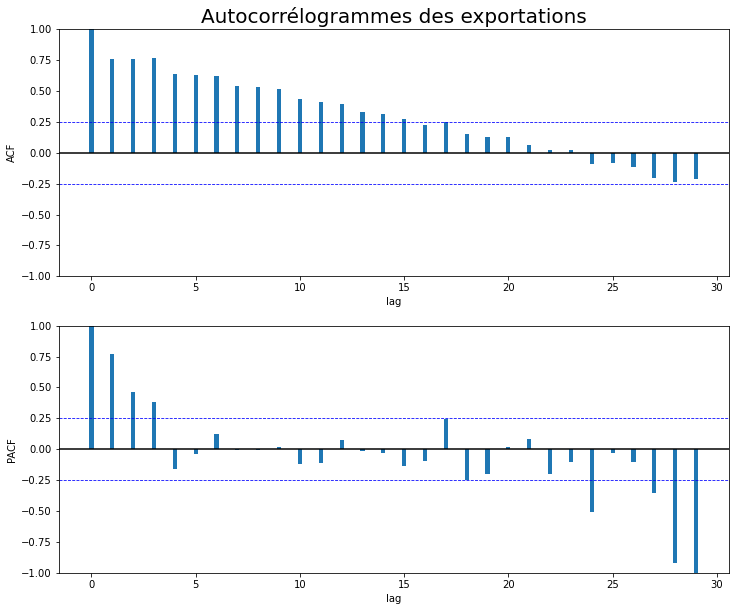

In [53]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf1)), acf1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)
plt.title('Autocorrélogrammes des exportations', fontsize=20)

plt.subplot(212)
plt.bar(range(len(pacf1)), pacf1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf1.png')
plt.show()

In [54]:
FRX_dif1 = FRX_tronc1 - FRX_tronc1.shift(1)

acf1_1 = acf(FRX_dif1[1:], nlags=29)
pacf1_1 = pacf(FRX_dif1[1:], nlags=29)

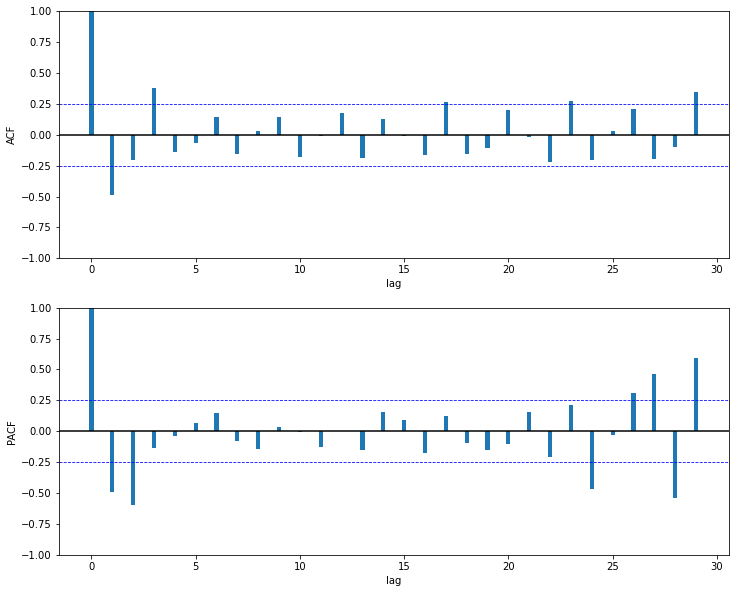

In [55]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf1_1)), acf1_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf1_1)), pacf1_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf1_1.png')
plt.show()

In [56]:
import pmdarima as pm

In [57]:
X1model = pm.auto_arima(FRX_tronc1, start_p=1, start_q=1,
                        test='adf',
                        max_p=4, max_q=4, m=12,
                        start_P=0, seasonal=True,
                        d=None, D=1, trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

X1model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=872.227, Time=4.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=875.343, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=873.116, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=871.625, Time=1.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=869.905, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=871.610, Time=1.58 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=3.11 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=870.467, Time=0.50 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=870.991, Time=0.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=871.396, Time=0.10 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=871.930, Time=0.64 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=872.249, Time=0.18 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 12.424 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   61
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -432.952
Date:                             Mon, 28 Mar 2022   AIC                            869.905
Time:                                     10:48:45   BIC                            873.647
Sample:                                          0   HQIC                           871.319
                                              - 61                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3258      0.039     -8.400      0.000      -0.402      -0.250
sigma2      2.783e+06   4.62e+05      6.023      0.000    1.88e+06    3.69e+06
===================================================================================
Ljung-Box (L1) (Q):                   7.40   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.01   Prob(JB):                         0.88
Heteroskedasticity (H):               1.98   Skew:                            -0.16
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
# prédiction
n_periods = len(FRX_a_prevoir1)
fitted_X1, confint_X1 = X1model.predict(n_periods=n_periods, return_conf_int=True)

# préparation des series
fitted_series_X1 = pd.Series(fitted_X1, index = FRX_a_prevoir1.index)
lower_series_X1 = pd.Series(confint_X1[:, 0], index = FRX_a_prevoir1.index)
upper_series_X1 = pd.Series(confint_X1[:, 1], index = FRX_a_prevoir1.index)

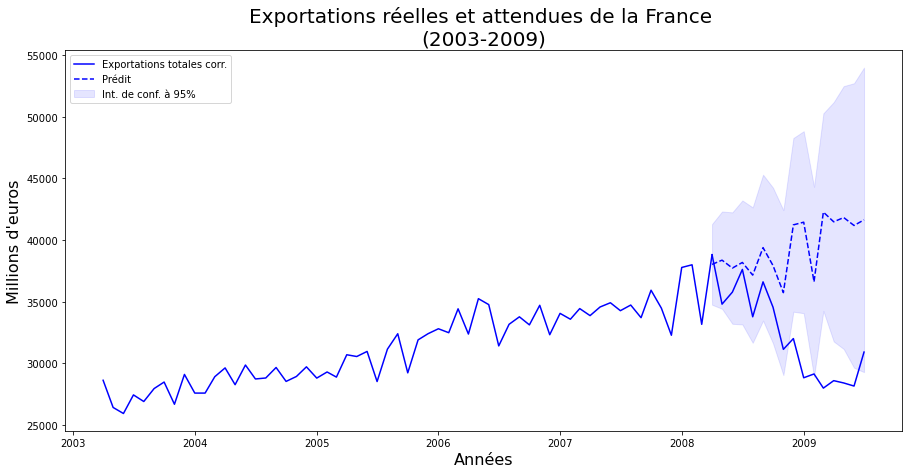

In [160]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(FRX_tronc1.index, FRX_tronc1, label='Exportations totales corr.', color='b')
ax.plot(FRX_a_prevoir1.index, FRX_a_prevoir1, color='b')
ax.plot(FRX_a_prevoir1.index, fitted_series_X1, color='b', linestyle='--', label='Prédit')
ax.fill_between(FRX_a_prevoir1.index, lower_series_X1, upper_series_X1, color='b', alpha=0.1, label='Int. de conf. à 95%')

plt.title('Exportations réelles et attendues de la France \n(2003-2009)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper left')

plt.savefig('P8_FR_Xfitted1.png');

In [60]:
impact_FRX = pd.DataFrame(((FRX_a_prevoir1/fitted_series_X1)-1).round(3).dropna())
impact_FRX['abosolut'] = (FRX_a_prevoir1 - fitted_series_X1).round(2).dropna()
impact_FRX.rename(columns = {0: 'relative'}, inplace=True)
impact_FRX

,relative,abosolut
2008-04-01,0.021,785.76
2008-05-01,-0.093,-3567.04
2008-06-01,-0.052,-1949.17
2008-07-01,-0.015,-567.08
2008-08-01,-0.091,-3380.34
2008-09-01,-0.070,-2774.93
2008-10-01,-0.089,-3379.57
2008-11-01,-0.129,-4598.58
2008-12-01,-0.224,-9218.05
2009-01-01,-0.304,-12613.67


In [61]:
impact_FRX.mean()

relative      -0.174625
abosolut   -7065.008125
dtype: float64

In [62]:
FRM_tronc1 = FR_series['impo_ma']['04/01/2003':'04/01/2008']
FRM_a_prevoir1 = FR_series['impo_ma']['04/01/2008':'07/01/2009']

In [63]:
acf2 = acf(np.asarray(FRM_tronc1), nlags = 29)
pacf2 = pacf(np.asarray(FRM_tronc1), nlags = 29)

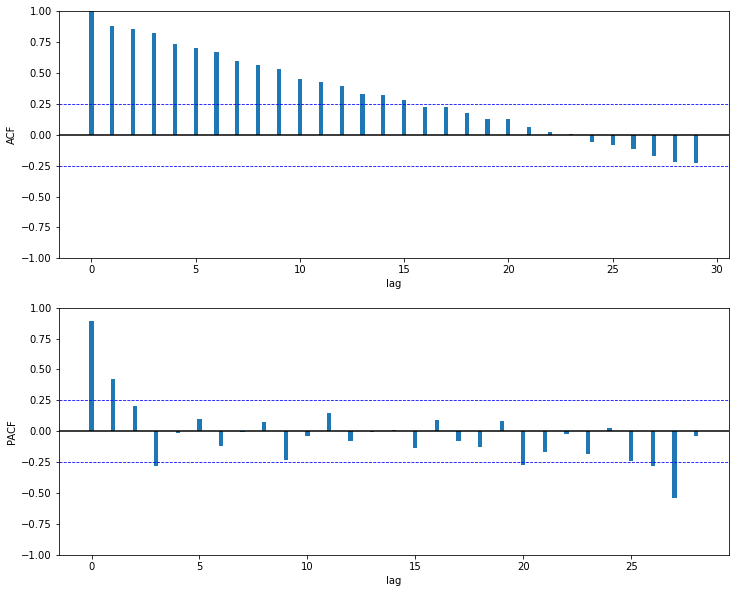

In [64]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf2)), acf2, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf2[1:])), pacf2[1:], width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf2.png')
plt.show()

In [65]:
FRM_dif1 = FRM_tronc1 - FRM_tronc1.shift(1)

acf2_1 = acf(FRM_dif1[1:], nlags=29)
pacf2_1 = pacf(FRM_dif1[1:], nlags=29)

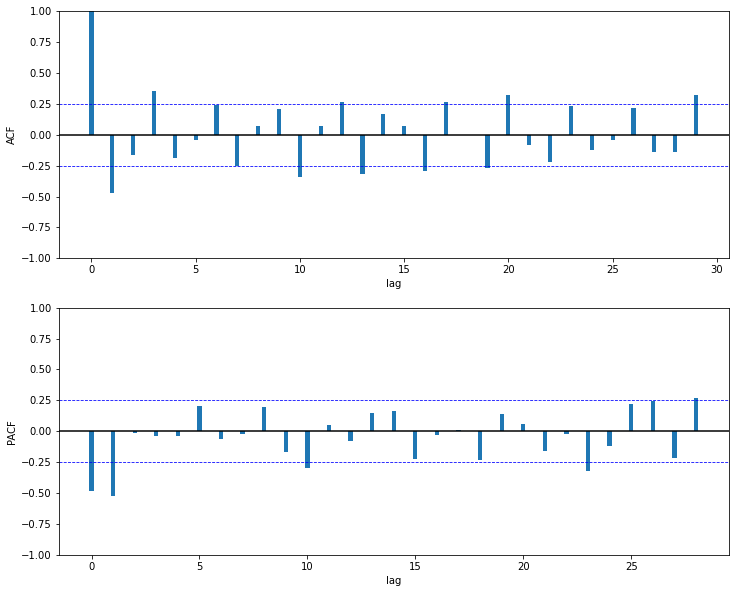

In [66]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf2_1)), acf2_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf2_1[1:])), pacf2_1[1:], width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf2_1.png')
plt.show()

In [67]:
M1model = pm.auto_arima(FRM_tronc1, start_p=1, start_q=1,
                        test='adf',
                        max_p=3, max_q=3, m=12,
                        start_P=0, seasonal=True,
                        d=None, D=1, trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

M1model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=876.629, Time=0.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=879.595, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=876.032, Time=0.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=874.503, Time=0.55 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=872.607, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=874.496, Time=0.47 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=2.61 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=874.728, Time=0.20 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=874.091, Time=0.16 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=874.154, Time=0.10 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=876.083, Time=0.37 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=873.734, Time=0.39 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 6.205 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   61
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -434.303
Date:                             Mon, 28 Mar 2022   AIC                            872.607
Time:                                     10:48:58   BIC                            876.349
Sample:                                          0   HQIC                           874.021
                                              - 61                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3117      0.040     -7.806      0.000      -0.390      -0.233
sigma2      3.154e+06   7.22e+05      4.368      0.000    1.74e+06    4.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   7.60   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.01   Prob(JB):                         0.55
Heteroskedasticity (H):               1.77   Skew:                             0.02
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
# prediction
n_periods = len(FRM_a_prevoir1)
fitted_M1, confint_M1 = M1model.predict(n_periods=n_periods, return_conf_int=True)

# préparation des series
fitted_series_M1 = pd.Series(fitted_M1, index = FRM_a_prevoir1.index)
lower_series_M1 = pd.Series(confint_M1[:, 0], index = FRM_a_prevoir1.index)
upper_series_M1 = pd.Series(confint_M1[:, 1], index = FRM_a_prevoir1.index)

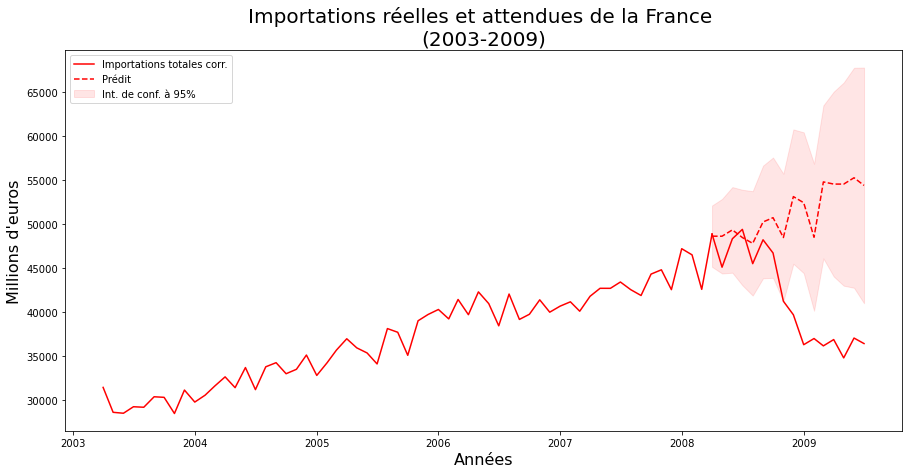

In [159]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(FRM_tronc1.index, FRM_tronc1, label='Importations totales corr.', color='r')
ax.plot(FRM_a_prevoir1.index, FRM_a_prevoir1, color='r')
ax.plot(FRM_a_prevoir1.index, fitted_series_M1, color='r', linestyle='--', label='Prédit')
ax.fill_between(FRM_a_prevoir1.index, lower_series_M1, upper_series_M1, color='r', alpha=0.1, label='Int. de conf. à 95%')

plt.title('Importations réelles et attendues de la France \n(2003-2009)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper left')

plt.savefig('P8_FR_Mfitted1.png');

In [70]:
impact_FRM = pd.DataFrame(((FRM_a_prevoir1/fitted_series_M1)-1).round(3).dropna())
impact_FRM['abosolut'] = (FRM_a_prevoir1 - fitted_series_M1).round(2).dropna()
impact_FRM.rename(columns = {0: 'relative'}, inplace=True)
impact_FRM

,relative,abosolut
2008-04-01,0.005,245.99
2008-05-01,-0.072,-3514.50
2008-06-01,-0.020,-1005.48
2008-07-01,0.019,926.22
2008-08-01,-0.048,-2300.76
2008-09-01,-0.040,-2019.93
2008-10-01,-0.079,-4004.47
2008-11-01,-0.149,-7221.54
2008-12-01,-0.252,-13405.64
2009-01-01,-0.307,-16101.50


In [71]:
impact_FRM.mean()

relative      -0.178875
abosolut   -9497.443125
dtype: float64

In [72]:
FRT_tronc1 = FR_series['tot_trade_ma']['04/01/2003':'04/01/2008']
FRT_a_prevoir1 = FR_series['tot_trade_ma']['04/01/2008':'07/01/2009']

In [73]:
acf3 = acf(np.asarray(FRT_tronc1), nlags = 29)
pacf3 = pacf(np.asarray(FRT_tronc1), nlags = 29)

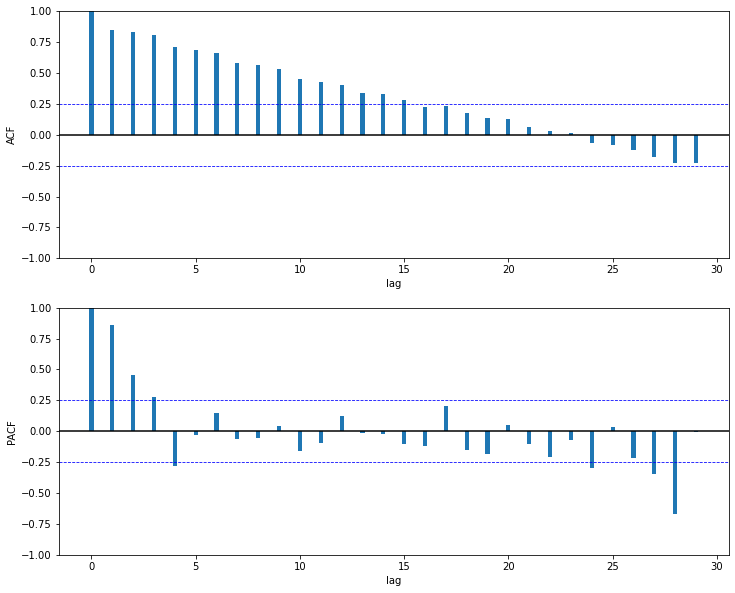

In [74]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf3)), acf3, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf3)), pacf3, width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf2.png')
plt.show()

In [75]:
FRT_dif1 = FRT_tronc1 - FRT_tronc1.shift(1)

acf3_1 = acf(FRM_dif1[1:], nlags=29)
pacf3_1 = pacf(FRM_dif1[1:], nlags=29)

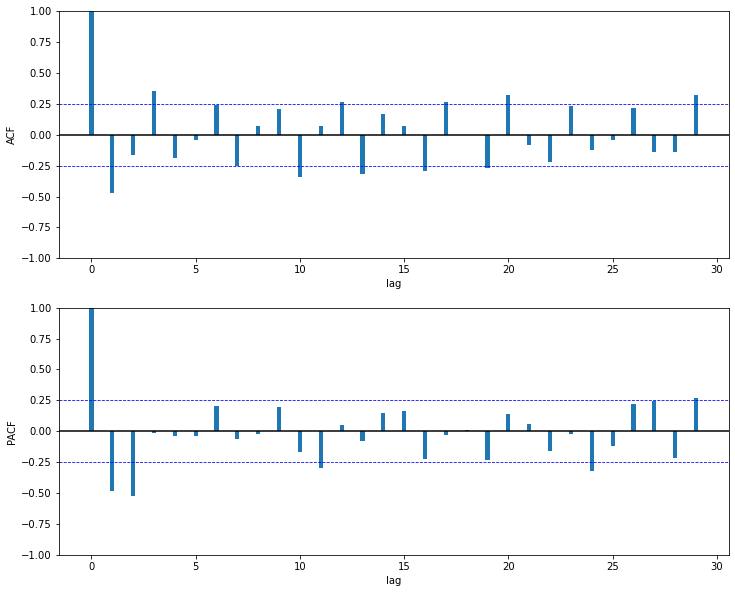

In [76]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf3_1)), acf3_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf3_1)), pacf3_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf3_1.png')
plt.show()

In [77]:
T1model = pm.auto_arima(FRT_tronc1, start_p=1, start_q=1,
                        test='adf',
                        max_p=3, max_q=3, m=12,
                        start_P=0, seasonal=True,
                        d=None, D=1, trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

T1model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=940.925, Time=0.98 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=938.519, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=938.189, Time=0.49 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=936.055, Time=2.53 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=936.856, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=2.57 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=936.933, Time=4.18 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=938.669, Time=0.60 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=5.71 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=940.389, Time=0.87 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=938.973, Time=0.80 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=938.202, Time=0.57 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=937.887, Time=1.79 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=941.239, Time=0.84 sec

Best model:  ARIMA(0,1,1)(0,1,1)[12]    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   61
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -465.027
Date:                            Mon, 28 Mar 2022   AIC                            936.055
Time:                                    10:49:27   BIC                            941.669
Sample:                                         0   HQIC                           938.176
                                             - 61                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1915      0.042     -4.516      0.000      -0.275      -0.108
ma.S.L12      -0.0251      0.196     -0.128      0.898      -0.409       0.359
sigma2      1.492e+07   5.16e-09   2.89e+15      0.000    1.49e+07    1.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  10.55   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.00   Prob(JB):                         0.76
Heteroskedasticity (H):               2.28   Skew:                             0.17
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.53e+32. Standard errors may be unstable.
"""

In [78]:
# prediction
n_periods = len(FRT_a_prevoir1)
fitted_T1, confint_T1 = T1model.predict(n_periods=n_periods, return_conf_int=True)

# préparation des series
fitted_series_T1 = pd.Series(fitted_T1, index = FRT_a_prevoir1.index)
lower_series_T1 = pd.Series(confint_T1[:, 0], index = FRT_a_prevoir1.index)
upper_series_T1 = pd.Series(confint_T1[:, 1], index = FRT_a_prevoir1.index)

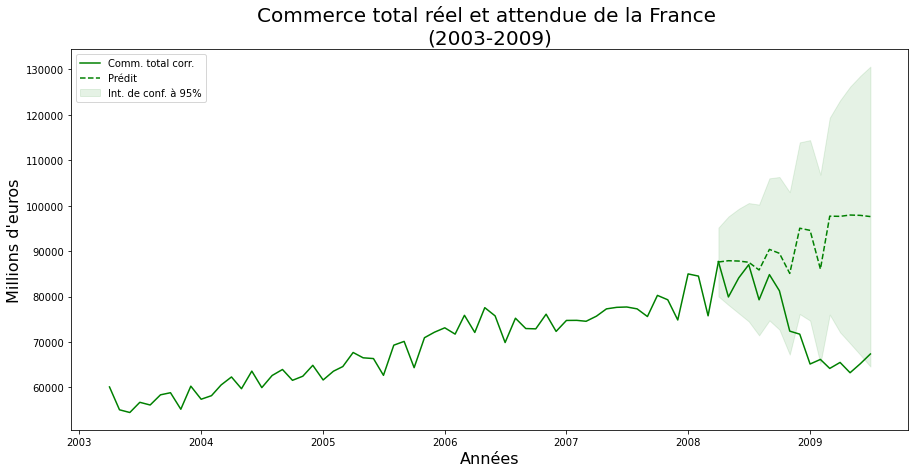

In [158]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(FRT_tronc1.index, FRT_tronc1, label='Comm. total corr.', color='g')
ax.plot(FRT_a_prevoir1.index, FRT_a_prevoir1, color='g')
ax.plot(FRT_a_prevoir1.index, fitted_series_T1, color='g', linestyle='--', label='Prédit')
ax.fill_between(FRT_a_prevoir1.index, lower_series_T1, upper_series_T1, color='g', alpha=0.1, label='Int. de conf. à 95%')

plt.title('Commerce total réel et attendue de la France \n(2003-2009)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper left')

plt.savefig('P8_FR_Tfitted1.png');

In [80]:
impact_FRT = pd.DataFrame(((FRT_a_prevoir1/fitted_series_T1)-1).round(3).dropna())
impact_FRT['abosolut'] = (FRT_a_prevoir1 - fitted_series_T1).round(2).dropna()
impact_FRT.rename(columns = {0: 'relative'}, inplace=True)
impact_FRT

,relative,abosolut
2008-04-01,0.001,83.99
2008-05-01,-0.091,-7976.33
2008-06-01,-0.042,-3701.61
2008-07-01,-0.006,-533.35
2008-08-01,-0.076,-6560.88
2008-09-01,-0.061,-5552.51
2008-10-01,-0.092,-8249.07
2008-11-01,-0.149,-12704.85
2008-12-01,-0.245,-23313.39
2009-01-01,-0.311,-29416.57


In [81]:
impact_FRT.mean()

relative       -0.185750
abosolut   -17566.289375
dtype: float64

### Crise Covid-19

In [82]:
FRX_tronc2 = FR_series['expo_ma']['01/01/2015':'30/01/2020']
FRX_a_prevoir2 = FR_series['expo_ma']['30/01/2020':'01/01/2021']

In [83]:
len2 = len(FRX_tronc2)
len2

61

In [84]:
acf4 = acf(np.asarray(FRX_tronc2), nlags = 29)
pacf4 = pacf(np.asarray(FRX_tronc2), nlags = 29)

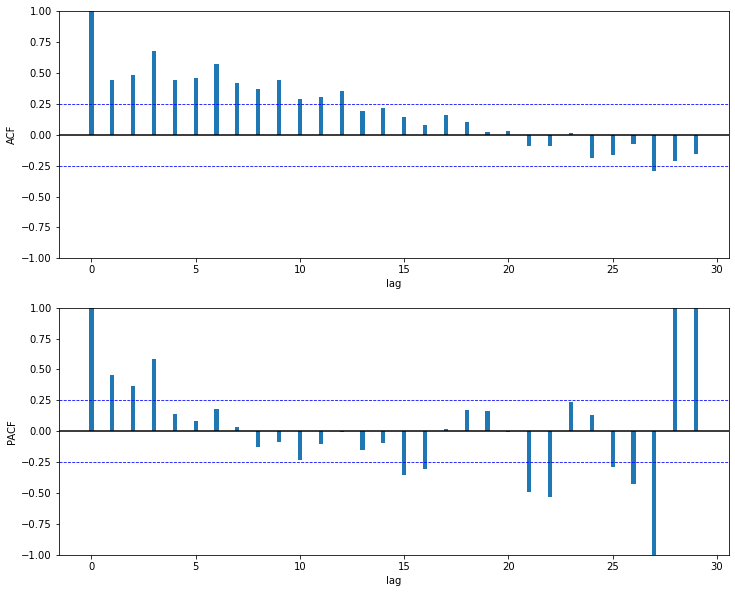

In [85]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf4)), acf4, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf4)), pacf4, width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len1), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf4.png')
plt.show()

In [86]:
FRX2_dif1 = FRX_tronc2 - FRX_tronc2.shift(1)

acf4_1 = acf(FRX2_dif1[1:], nlags=29)
pacf4_1 = pacf(FRX2_dif1[1:], nlags=29)

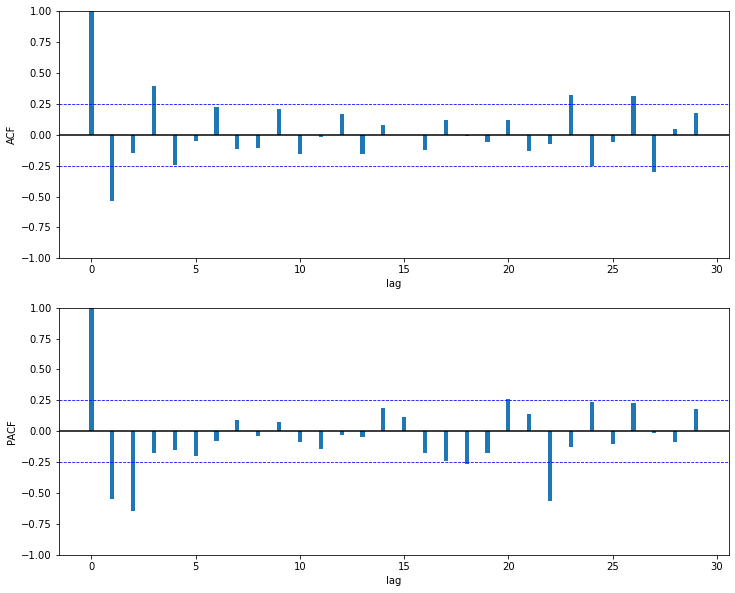

In [87]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf4_1)), acf4_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf4_1)), pacf4_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf4_1.png')
plt.show()

In [88]:
X2model = pm.auto_arima(FRX_tronc2, start_p=1, start_q=1,
                        test='adf',
                        max_p=3, max_q=3, m=12,
                        start_P=0, seasonal=True,
                        d=None, D=1, trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

X2model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=911.524, Time=2.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=911.195, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=911.186, Time=0.43 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=909.595, Time=1.32 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=908.154, Time=0.28 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=909.851, Time=1.28 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=3.18 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=914.962, Time=0.39 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=910.036, Time=0.59 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=909.430, Time=0.10 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=909.986, Time=0.37 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 11.974 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   61
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -452.077
Date:                             Mon, 28 Mar 2022   AIC                            908.154
Time:                                     10:49:46   BIC                            911.897
Sample:                                          0   HQIC                           909.569
                                              - 61                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1847      0.047     -3.967      0.000      -0.276      -0.093
sigma2      8.627e+06   1.05e-11   8.19e+17      0.000    8.63e+06    8.63e+06
===================================================================================
Ljung-Box (L1) (Q):                   8.28   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               0.75   Skew:                            -0.05
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [89]:
# prediction
n_periods = len(FRX_a_prevoir2)
fitted_X2, confint_X2 = X2model.predict(n_periods=n_periods, return_conf_int=True)

# préparation des series
fitted_series_X2 = pd.Series(fitted_X2, index = FRX_a_prevoir2.index)
lower_series_X2 = pd.Series(confint_X2[:, 0], index = FRX_a_prevoir2.index)
upper_series_X2 = pd.Series(confint_X2[:, 1], index = FRX_a_prevoir2.index)

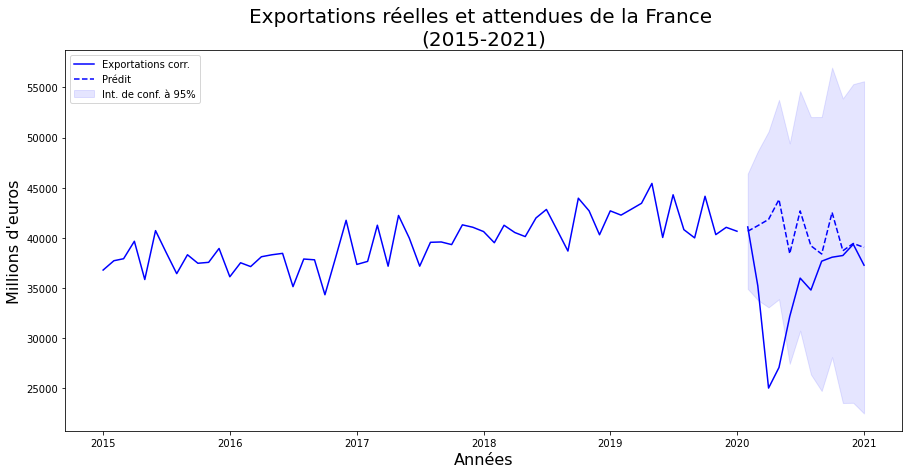

In [163]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(FRX_tronc2.index, FRX_tronc2, label='Exportations corr.', color='b')
ax.plot(FRX_a_prevoir2.index, FRX_a_prevoir2, color='b')
ax.plot(FRX_a_prevoir2.index, fitted_series_X2, color='b', linestyle='--', label='Prédit')
ax.fill_between(FRX_a_prevoir2.index, lower_series_X2, upper_series_X2, color='b', alpha=0.1, label='Int. de conf. à 95%')

plt.title('Exportations réelles et attendues de la France \n(2015-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper left')

plt.savefig('P8_FR_Xfitted2.png');

In [91]:
impact_FRX2 = pd.DataFrame(((FRX_a_prevoir2/fitted_series_X2)-1).round(3).dropna())
impact_FRX2['abosolut'] = (FRX_a_prevoir2 - fitted_series_X2).round(2).dropna()
impact_FRX2.rename(columns = {0: 'relative'}, inplace=True)
impact_FRX2

,relative,abosolut
2020-02-01,0.011,432.96
2020-03-01,-0.146,-6011.04
2020-04-01,-0.403,-16851.04
2020-05-01,-0.383,-16780.04
2020-06-01,-0.163,-6275.04
2020-07-01,-0.157,-6712.04
2020-08-01,-0.113,-4422.04
2020-09-01,-0.019,-715.04
2020-10-01,-0.105,-4476.04
2020-11-01,-0.012,-475.04


In [92]:
impact_FRX2.mean()

relative      -0.128167
abosolut   -5345.456667
dtype: float64

In [93]:
FRM_tronc2 = FR_series['impo_ma']['01/01/2015':'30/01/2020']
FRM_a_prevoir2 = FR_series['impo_ma']['30/01/2020':'01/01/2021']

In [94]:
acf5 = acf(np.asarray(FRM_tronc2), nlags = 29)
pacf5 = pacf(np.asarray(FRM_tronc2), nlags = 29)

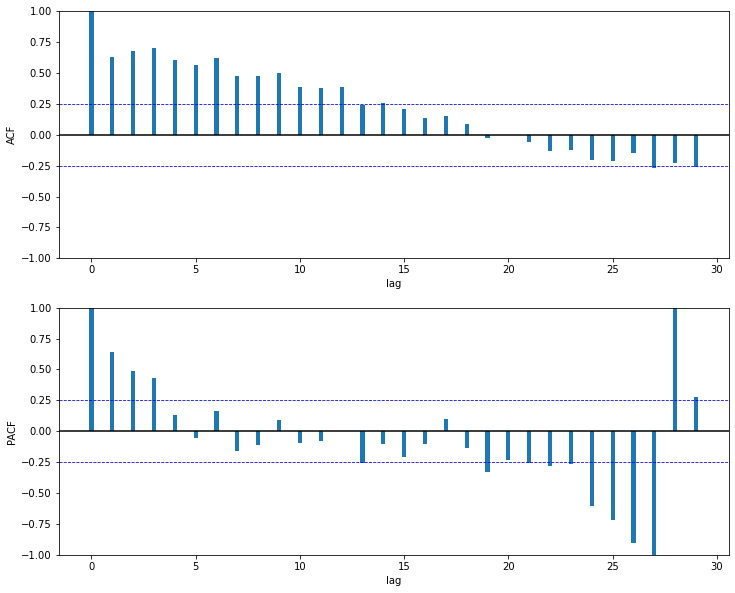

In [95]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf5)), acf5, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf5)), pacf5, width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf5.png')
plt.show()

In [96]:
FRM2_dif1 = FRM_tronc2 - FRM_tronc2.shift(1)

acf5_1 = acf(FRM2_dif1[1:], nlags=29)
pacf5_1 = pacf(FRM2_dif1[1:], nlags=29)

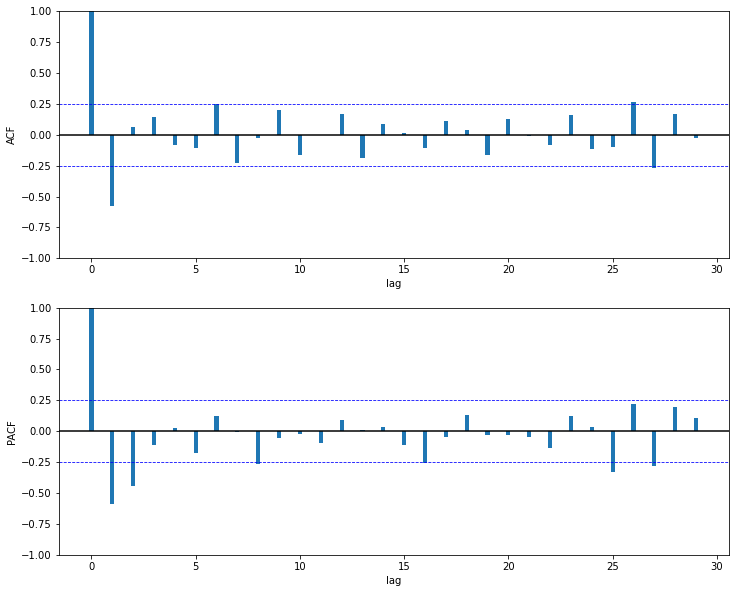

In [97]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf5_1)), acf5_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf5_1)), pacf5_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf5_1.png')
plt.show()

In [98]:
M2model = pm.auto_arima(FRM_tronc2, start_p=1, start_q=1,
                        test='adf',
                        max_p=3, max_q=3, m=12,
                        start_P=0, seasonal=True,
                        d=None, D=1, trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

M2model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=904.126, Time=1.00 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=915.133, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=904.597, Time=0.63 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=902.948, Time=0.79 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=912.687, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=902.552, Time=1.26 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=905.877, Time=0.54 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=904.163, Time=2.39 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=904.284, Time=2.99 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=902.290, Time=1.85 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=907.084, Time=0.69 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=902.929, Time=1.83 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=903.239, Time=1.23 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=901.459, Time=1.01 sec
 ARIMA(1,1,0)(0,1,1)[12]         

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   61
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -446.730
Date:                                 Mon, 28 Mar 2022   AIC                            901.459
Time:                                         10:50:21   BIC                            908.944
Sample:                                              0   HQIC                           904.288
                                                  - 61                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1851      0.063     -2.932      0.003      -0.309      -0.061
ma.S.L12      -0.3244      0.185     -1.753      0.080      -0.687       0.038
ma.S.L24      -0.1106      0.131     -0.843      0.399      -0.368       0.147
sigma2      6.982e+06    1.8e+06      3.874      0.000    3.45e+06    1.05e+07
===================================================================================
Ljung-Box (L1) (Q):                   5.68   Jarque-Bera (JB):                 1.07
Prob(Q):                              0.02   Prob(JB):                         0.59
Heteroskedasticity (H):               0.72   Skew:                             0.33
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
# prediction
n_periods = len(FRM_a_prevoir2)
fitted_M2, confint_M2 = M2model.predict(n_periods=n_periods, return_conf_int=True)

# préparation des series
fitted_series_M2 = pd.Series(fitted_M2, index = FRX_a_prevoir2.index)
lower_series_M2 = pd.Series(confint_M2[:, 0], index = FRX_a_prevoir2.index)
upper_series_M2 = pd.Series(confint_M2[:, 1], index = FRX_a_prevoir2.index)

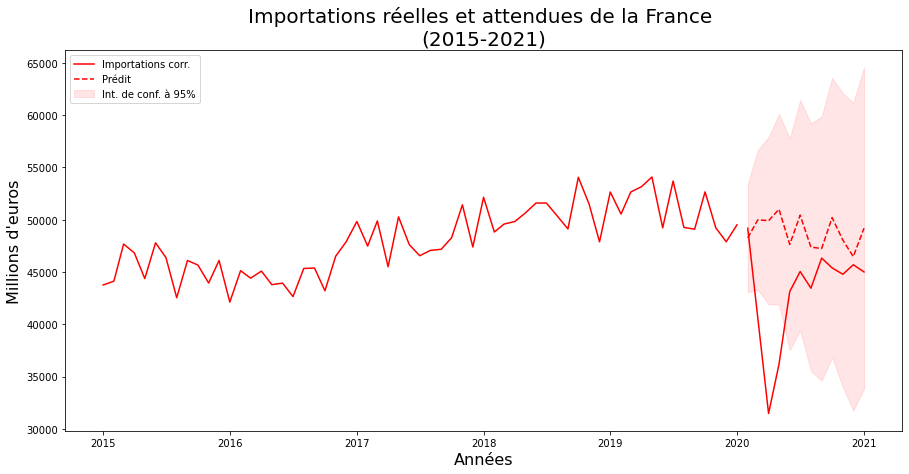

In [164]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(FRM_tronc2.index, FRM_tronc2, label='Importations corr.', color='r')
ax.plot(FRM_a_prevoir2.index, FRM_a_prevoir2, color='r')
ax.plot(FRM_a_prevoir2.index, fitted_series_M2, color='r', linestyle='--', label='Prédit')
ax.fill_between(FRM_a_prevoir2.index, lower_series_M2, upper_series_M2, color='r', alpha=0.1, label='Int. de conf. à 95%')

plt.title('Importations réelles et attendues de la France \n(2015-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper left')

plt.savefig('P8_FR_Mfitted2.png');

In [101]:
impact_FRM2 = pd.DataFrame(((FRM_a_prevoir2/fitted_series_M2)-1).round(3).dropna())
impact_FRM2['abosolut'] = (FRM_a_prevoir2 - fitted_series_M2).round(2).dropna()
impact_FRM2.rename(columns = {0: 'relative'}, inplace=True)
impact_FRM2

,relative,abosolut
2020-02-01,0.019,933.95
2020-03-01,-0.188,-9391.60
2020-04-01,-0.369,-18433.37
2020-05-01,-0.291,-14829.85
2020-06-01,-0.095,-4508.97
2020-07-01,-0.107,-5392.91
2020-08-01,-0.083,-3922.04
2020-09-01,-0.019,-913.65
2020-10-01,-0.096,-4808.27
2020-11-01,-0.068,-3267.70


In [102]:
impact_FRM2.mean()

relative      -0.116583
abosolut   -5791.455000
dtype: float64

In [103]:
FRT_tronc2 = FR_series['tot_trade_ma']['01/01/2015':'30/01/2020']
FRT_a_prevoir2 = FR_series['tot_trade_ma']['30/01/2020':'01/01/2021']

In [104]:
acf6 = acf(np.asarray(FRT_tronc2), nlags = 29)
pacf6 = pacf(np.asarray(FRT_tronc2), nlags = 29)

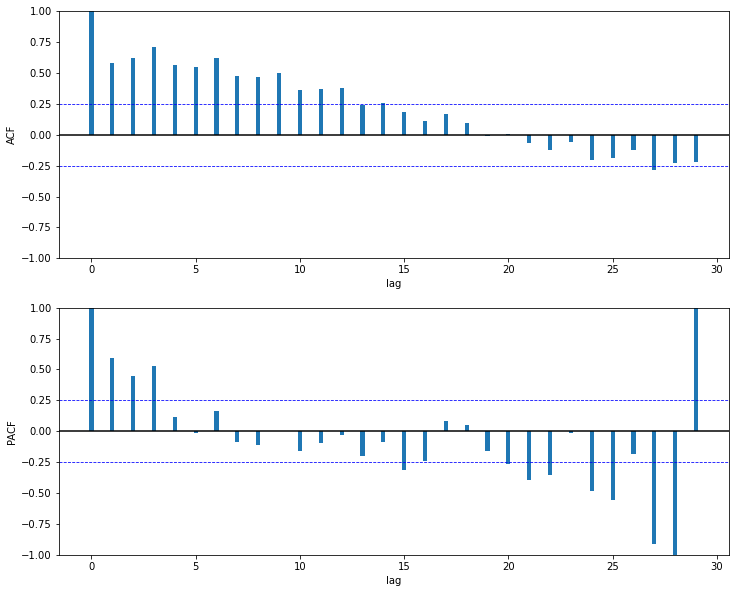

In [105]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf6)), acf6, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf6)), pacf6, width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf6.png')
plt.show()

In [106]:
FRT2_dif1 = FRT_tronc2 - FRT_tronc2.shift(1)

acf6_1 = acf(FRT2_dif1[1:], nlags=29)
pacf6_1 = pacf(FRT2_dif1[1:], nlags=29)

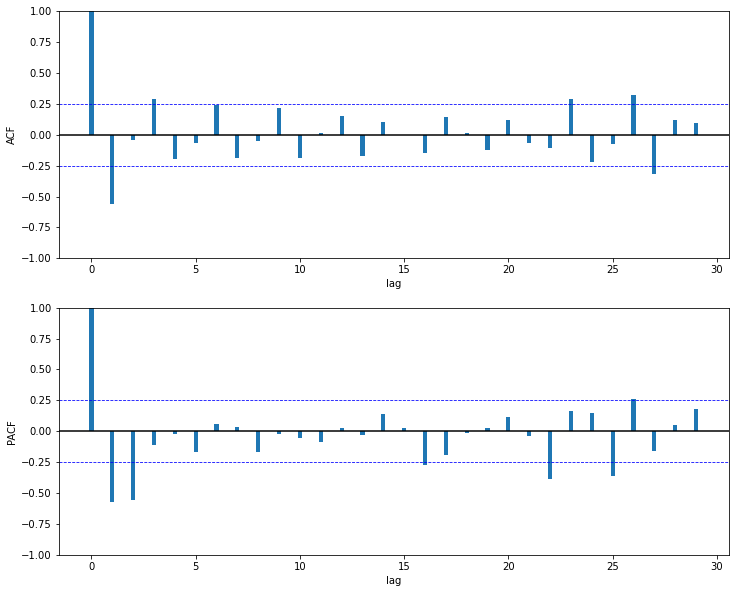

In [107]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.2)

plt.subplot(211)
plt.bar(range(len(acf6_1)), acf6_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('ACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.subplot(212)
plt.bar(range(len(pacf6_1)), pacf6_1, width = 0.2)
plt.xlabel('lag')
plt.ylabel('PACF')
plt.axhline(y=0, color='black')
plt.axhline(y=-1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.axhline(y=1.96/np.sqrt(len2), color='b', linestyle='--', linewidth=0.8)
plt.ylim(-1, 1)

plt.savefig('P8_acf6_1.png')
plt.show()

In [108]:
T2model = pm.auto_arima(FRT_tronc2, start_p=1, start_q=1,
                        test='adf',
                        max_p=3, max_q=3, m=12,
                        start_P=0, seasonal=True,
                        d=None, D=1, trace=True,
                        error_action='ignore',  
                        suppress_warnings=True, 
                        stepwise=True)

T2model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=976.364, Time=1.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=974.534, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=972.250, Time=0.53 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=974.015, Time=1.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=972.948, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=968.239, Time=1.00 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=968.174, Time=2.28 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.59 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=970.152, Time=4.54 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=968.152, Time=2.59 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=966.624, Time=1.21 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=971.059, Time=0.64 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=969.776, Time=0.76 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=970.919, Time=1.55 sec
 ARIMA(1,1,1)(0,1,2)[12]             

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   61
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -479.312
Date:                                 Mon, 28 Mar 2022   AIC                            966.624
Time:                                         10:51:00   BIC                            974.109
Sample:                                              0   HQIC                           969.453
                                                  - 61                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1486      0.056     -2.643      0.008      -0.259      -0.038
ma.S.L12      -0.2838      0.156     -1.814      0.070      -0.590       0.023
ma.S.L24      -0.1623      0.087     -1.855      0.064      -0.334       0.009
sigma2      2.572e+07   8.55e-10   3.01e+16      0.000    2.57e+07    2.57e+07
===================================================================================
Ljung-Box (L1) (Q):                   7.29   Jarque-Bera (JB):                 1.27
Prob(Q):                              0.01   Prob(JB):                         0.53
Heteroskedasticity (H):               0.85   Skew:                             0.27
Prob(H) (two-sided):                  0.75   Kurtosis:                         2.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.57e+32. Standard errors may be unstable.
"""

In [109]:
# prediction
n_periods = len(FRT_a_prevoir2)
fitted_T2, confint_T2 = T2model.predict(n_periods=n_periods, return_conf_int=True)

# préparation des series
fitted_series_T2 = pd.Series(fitted_T2, index = FRT_a_prevoir2.index)
lower_series_T2 = pd.Series(confint_T2[:, 0], index = FRT_a_prevoir2.index)
upper_series_T2 = pd.Series(confint_T2[:, 1], index = FRT_a_prevoir2.index)

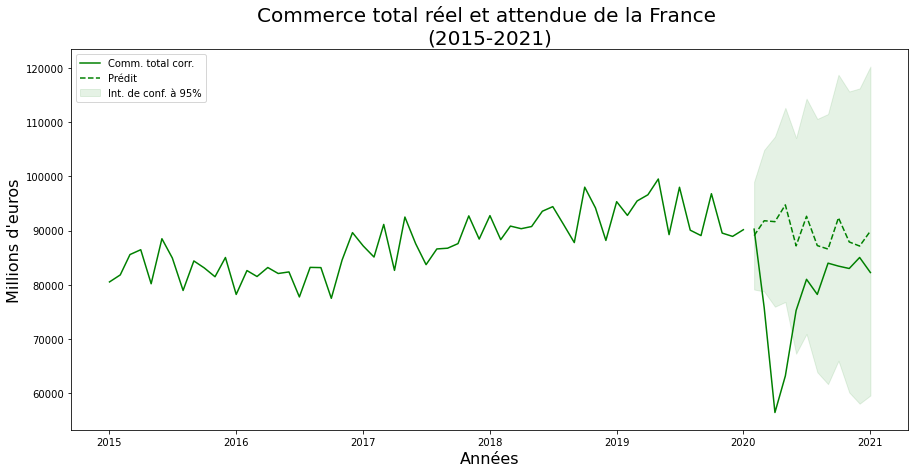

In [165]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(FRT_tronc2.index, FRT_tronc2, label='Comm. total corr.', color='g')
ax.plot(FRT_a_prevoir2.index, FRT_a_prevoir2, color='g')
ax.plot(FRT_a_prevoir2.index, fitted_series_T2, color='g', linestyle='--', label='Prédit')
ax.fill_between(FRT_a_prevoir2.index, lower_series_T2, upper_series_T2, color='g', alpha=0.1, label='Int. de conf. à 95%')

plt.title('Commerce total réel et attendue de la France \n(2015-2021)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Années', fontsize=16)
plt.legend(loc='upper left')

plt.savefig('P8_FR_Tfitted2.png');

In [111]:
impact_FRT2 = pd.DataFrame(((FRT_a_prevoir2/fitted_series_T2)-1).round(3).dropna())
impact_FRT2['abosolut'] = (FRT_a_prevoir2 - fitted_series_T2).round(2).dropna()
impact_FRT2.rename(columns = {0: 'relative'}, inplace=True)
impact_FRT2

,relative,abosolut
2020-02-01,0.013,1189.02
2020-03-01,-0.175,-16025.73
2020-04-01,-0.384,-35196.44
2020-05-01,-0.333,-31535.35
2020-06-01,-0.137,-11908.37
2020-07-01,-0.126,-11628.64
2020-08-01,-0.103,-9008.06
2020-09-01,-0.030,-2600.32
2020-10-01,-0.097,-8916.66
2020-11-01,-0.056,-4894.76


In [112]:
impact_FRT2.mean()

relative       -0.128083
abosolut   -11690.673333
dtype: float64

Debut de la presentation!!!
jUSTIFICATION: domain business et commerce international
    atraction pour les series temporelles et la prédiction
    comparation du analyse theorique et empirique
    

In [113]:
cri_fin = pd.DataFrame(fitted_series_T1)
cri_fin.rename(columns = {0: 'fitted1'}, inplace=True)
cri_fin['int_inf1'] = lower_series_T1
cri_fin['int_sup1'] = upper_series_T1
cri_fin['real1'] = FRT_a_prevoir1
cri_fin.reset_index(inplace=True)
cri_fin.drop(columns=['index'], inplace=True)
cri_fin

,fitted1,int_inf1,int_sup1,real1
0,87594.895331,80024.847007,95164.943656,87678.89
1,87883.095003,78148.351640,97617.838367,79906.77
2,87809.549925,76310.644539,99308.455311,84107.94
3,87544.566899,74518.269581,100570.864216,87011.22
4,85843.594936,71451.096247,100236.093626,79282.71
5,90375.947885,74736.139215,106015.756555,84823.44
6,89514.001531,72719.263904,106308.739158,81264.93
7,85088.451014,67213.250073,102963.651955,72383.60
8,95033.738082,76139.760063,113927.716102,71720.35
9,94564.235272,74703.671279,114424.799265,65147.67


In [114]:
cri_cov = pd.DataFrame(fitted_series_T2)
cri_cov.rename(columns = {0: 'fitted2'}, inplace=True)
cri_cov['int_inf2'] = lower_series_T2
cri_cov['int_sup2'] = upper_series_T2
cri_cov['real2'] = FRT_a_prevoir2
cri_cov.reset_index(inplace=True)
cri_cov.drop(columns=['index'], inplace=True)
cri_cov

,fitted2,int_inf2,int_sup2,real2
0,89059.454116,79117.867148,99001.041083,90248.47
1,91802.737639,78745.871606,104859.603672,75777.01
2,91629.326437,75948.376011,107310.276864,56432.89
3,94726.116904,76816.976652,112635.257155,63190.77
4,87163.311248,67271.949468,107054.673029,75254.94
5,92624.857254,70931.937273,114317.777235,80996.22
6,87219.771918,63863.806230,110575.737605,78211.71
7,86575.763623,61667.547831,111483.979415,83975.44
8,92350.591178,65981.341377,118719.840979,83433.93
9,87887.359368,60133.883170,115640.835565,82992.60


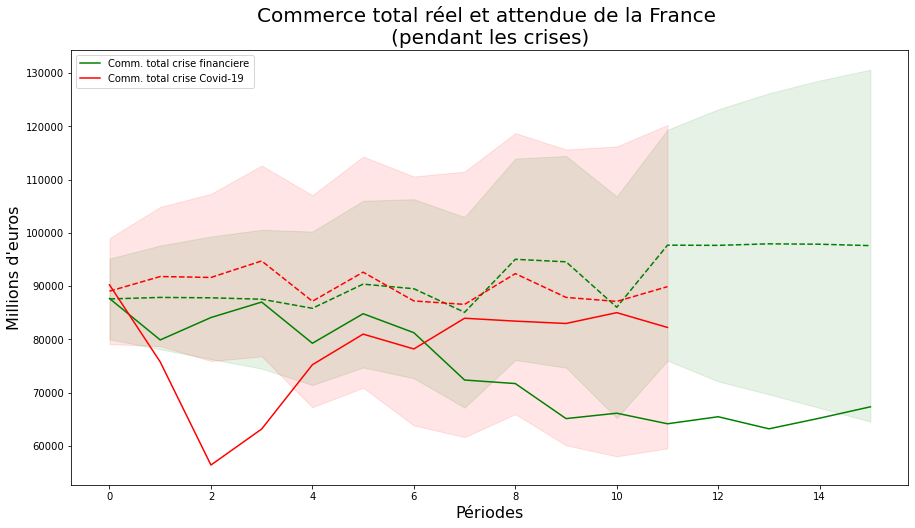

In [166]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(cri_fin.index, cri_fin['real1'], label='Comm. total crise financiere', color='g')
ax.plot(cri_fin.index, cri_fin['fitted1'], color='g', linestyle='--')
ax.fill_between(cri_fin.index, cri_fin['int_inf1'], cri_fin['int_sup1'], color='g', alpha=0.1)
ax.plot(cri_cov.index, cri_cov['real2'], label='Comm. total crise Covid-19', color='r')
ax.plot(cri_cov.index, cri_cov['fitted2'], color='r', linestyle='--')
ax.fill_between(cri_cov.index, cri_cov['int_inf2'], cri_cov['int_sup2'], color='r', alpha=0.1)

plt.title('Commerce total réel et attendue de la France \n(pendant les crises)', fontsize=20)
plt.ylabel('Millions d\'euros', fontsize=16)
plt.xlabel('Périodes', fontsize=16)
plt.legend(loc='upper left')

plt.savefig('P8_FR_compare.png');

In [116]:
# données des exportations
int_trade = pd.read_csv('C:/Users/Oscar Gomez/Desktop/Data Analyst/P8/int-trade-clean.csv', sep=';')
int_trade.rename(columns = {'Unnamed: 0': 'year'}, inplace=True)
int_trade.set_index('year', inplace=True)
int_trade.head()

,%PIB
year,
1970,25.012069
1971,25.164673
1972,25.389100
1973,28.421083
1974,33.269642


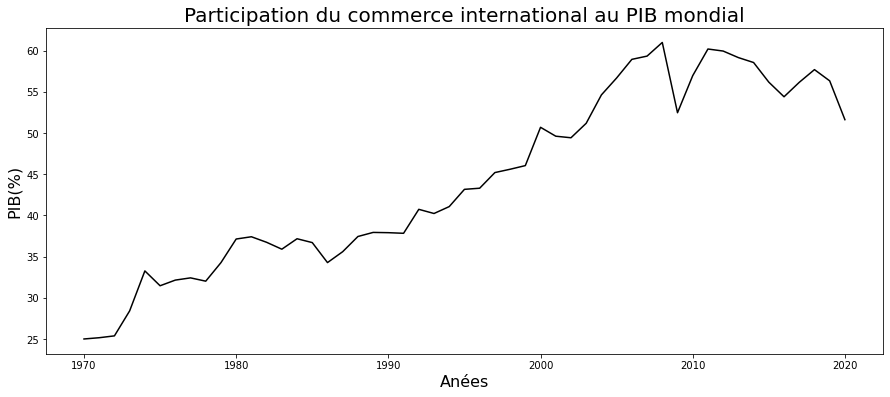

In [117]:
plt.figure(figsize=(15,6))

plt.plot(int_trade.index, int_trade['%PIB'], label='Commerce international', color='k')

plt.title('Participation du commerce international au PIB mondial', fontsize=20)
plt.ylabel('PIB(%)', fontsize=16)
plt.xlabel('Anées', fontsize=16)
plt.savefig('P8_FR_inttradetotal.png');